# gdp 변화량, 물가지수 변화량, 인구수 변화량을 고려한 2023년 행정구역별 카드 소비량 예측

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [371]:
# gdp 데이터 전처리 과정
# 데이터 출처는 https://kosis.kr/search/search.do?query=%EA%B5%AD%EB%82%B4%EC%B4%9D%EC%83%9D%EC%82%B0
gdp = pd.read_csv("real_gdp.csv" , encoding = 'utf-8')
gdp = gdp.transpose()
gdp.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
계정항목별,국내총생산,피용자보수,영업잉여,고정자본소모,생산 및 수입세,(공제)보조금,국내총생산에대한지출,민간최종소비지출,정부최종소비지출,총고정자본형성,재고증감및귀중품순취득,재화와서비스의수출,(공제)재화와서비스의수입,통계상불일치,국외순수취요소소득,국민총소득
1970,2796.6,940.8,1438.3,176.6,266.7,25.8,2796.6,2062.1,276.7,722.9,13.3,319.9,590.7,-7.6,50.8,2847.4
1971,3438.0,1161.8,1758.4,229.5,316.7,28.3,3438.0,2592.4,350.0,803.1,55.7,435.8,791.2,-7.6,26.2,3464.3
1972,4267.7,1412.3,2241.2,292.3,355.0,33.2,4267.7,3104.8,446.8,915.6,1.0,708.4,915.1,6.1,9.3,4277.0
1973,5527.3,1844.6,2848.3,410.6,462.8,39.0,5527.3,3798.6,491.0,1344.4,93.3,1322.4,1528.5,6.1,5.4,5532.7
1974,7905.0,2496.0,4129.4,582.2,762.1,64.7,7905.0,5443.6,759.3,2151.2,425.8,1757.3,2632.4,0.2,28.4,7933.4
1975,10543.6,3380.2,5323.9,795.8,1148.6,104.9,10543.6,7285.7,1169.3,2871.2,136.4,2388.4,3303.2,-4.2,-85.3,10458.3
1976,14472.8,4784.4,7015.3,1100.7,1624.4,51.9,14472.8,9315.5,1563.8,3818.8,180.9,3695.1,4102.9,1.7,-64.1,14408.7
1977,18608.1,6475.4,8600.0,1466.3,2118.3,51.9,18608.1,11361.5,1988.7,5451.3,150.8,4847.2,5187.3,-4.1,-53.2,18554.9
1978,25154.5,9239.4,11119.5,1913.4,2939.6,57.4,25154.5,15016.7,2493.3,8435.4,239.1,6287.6,7350.6,33.1,72.9,25227.5


In [372]:
np_array_gdp = np.array(gdp[0])
np_array_gdp = np_array_gdp[1 : ]
np_array_gdp

array([2796.6, 3438.0, 4267.7, 5527.3, 7905.0, 10543.6, 14472.8, 18608.1,
       25154.5, 32402.3, 39725.1, 49669.8, 57286.6, 68080.1, 78591.3,
       88129.7, 102985.8, 121697.8, 145994.7, 165801.8, 200556.2,
       242481.1, 277540.8, 315181.3, 372493.4, 436988.8, 490850.9,
       542001.8, 537215.3, 591453.0, 651634.4, 707021.3, 784741.3,
       837365.0, 908439.2, 957447.8, 1005601.5, 1089660.2, 1154216.5,
       1205347.7, 1322611.2, 1388937.2, 1440111.4, 1500819.1, 1562928.9,
       1658020.4, 1740779.6, 1835698.2, 1898192.6, 1924498.1, 1940726.2,
       2071658.0], dtype=object)

In [373]:
np_array_year = np.array(gdp.index[1 : ])
np_array_year

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'], dtype=object)

In [374]:
df_gdp = pd.DataFrame(np_array_gdp , index = np_array_year , columns = ['gdp'])
df_gdp.head(10)

,gdp
1970,2796.6
1971,3438.0
1972,4267.7
1973,5527.3
1974,7905.0
1975,10543.6
1976,14472.8
1977,18608.1
1978,25154.5
1979,32402.3


<Axes: >

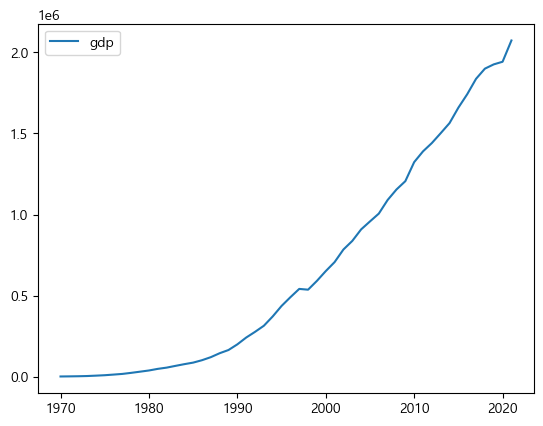

In [375]:
df_gdp.plot()

In [376]:
# 소비자 물가 지수 전처리 과정
# 데이터 출처는 https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_2KAA601_02&conn_path=I2
consumer_price_index = pd.read_excel("consumer_price_index.xls")
consumer_price_index

,통계표명:,소비자물가총지수와 주요 품목별 소비자물가상승률,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,단위:,"2020=100, %",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
2,소비자물가 총지수(2020=100),4.7,5.3,5.9,6.1,7.6,9.5,10.9,12.0,13.8,...,91.8,93.0,94.2,94.9,95.8,97.6,99.1,99.5,100.0,102.5
3,소비자물가상승률(%),16.0,13.5,11.7,3.2,24.3,25.2,15.3,10.1,14.5,...,2.2,1.3,1.3,0.7,1.0,1.9,1.5,0.4,0.5,2.5
4,식료품 · 비주류음료,-,-,-,-,-,-,-,-,-,...,4.0,0.9,0.3,1.6,2.3,3.4,2.8,0.0,4.4,5.9
5,주류 및 담배,-,-,-,-,-,-,-,-,-,...,1.5,1.7,-0.1,50.1,0.7,1.5,0.3,0.6,0.3,0.4
6,의류 및 신발,-,-,-,-,-,-,-,-,-,...,4.8,2.9,4.0,1.3,1.8,1.1,1.1,0.1,0.7,0.6
7,주택 ·수도 · 전기 및 연료,-,-,-,-,-,-,-,-,-,...,4.6,3.5,2.9,-0.6,-0.8,1.7,0.7,1.2,0.5,1.6
8,가정용품 및 가사 서비스,-,-,-,-,-,-,-,-,-,...,2.9,0.3,2.1,2.6,1.6,1.1,2.3,2.1,0.0,1.9
9,보건,-,-,-,-,-,-,-,-,-,...,0.9,0.4,0.7,1.3,1.0,0.9,-0.1,0.5,1.5,-0.1


In [377]:
consumer_price_index = consumer_price_index.transpose()
consumer_price_index

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
통계표명:,단위:,NaN,소비자물가 총지수(2020=100),소비자물가상승률(%),식료품 · 비주류음료,주류 및 담배,의류 및 신발,주택 ·수도 · 전기 및 연료,가정용품 및 가사 서비스,보건,교통,통신,오락 및 문화,교육,음식 및 숙박,기타 상품 및 서비스,출처:,NaN,주석:
소비자물가총지수와 주요 품목별 소비자물가상승률,"2020=100, %",1970,4.7,16.0,-,-,-,-,-,-,-,-,-,-,-,-,"통계청, 「소비자물가조사」","* 자료 : 통계청, 「소비자물가조사」 각 연도",1) 소비자물가상승률 = {(당해년도 연간소비자물가지수 ÷ 직전 연간소비자물가지수)...
Unnamed: 2,NaN,1971,5.3,13.5,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN
Unnamed: 3,NaN,1972,5.9,11.7,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN
Unnamed: 4,NaN,1973,6.1,3.2,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN
Unnamed: 5,NaN,1974,7.6,24.3,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN
Unnamed: 6,NaN,1975,9.5,25.2,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN
Unnamed: 7,NaN,1976,10.9,15.3,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN
Unnamed: 8,NaN,1977,12.0,10.1,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN
Unnamed: 9,NaN,1978,13.8,14.5,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN


In [378]:
index = np.array(consumer_price_index[:][1])[1 :].astype(int)
index

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [379]:
value = np.array(consumer_price_index[ : ][2])[1 :].astype(float)
value

array([  4.7,   5.3,   5.9,   6.1,   7.6,   9.5,  10.9,  12. ,  13.8,
        16.3,  21. ,  25.4,  27.3,  28.2,  28.8,  29.6,  30.4,  31.3,
        33.5,  35.4,  38.5,  42.1,  44.7,  46.8,  49.8,  52. ,  54.6,
        57. ,  61.3,  61.8,  63.2,  65.7,  67.5,  69.9,  72.4,  74.4,
        76.1,  78. ,  81.7,  83.9,  86.4,  89.9,  91.8,  93. ,  94.2,
        94.9,  95.8,  97.6,  99.1,  99.5, 100. , 102.5])

In [380]:
df_consumer_price_index = pd.DataFrame(value , index = index , columns = ['consumer_price_index'])
df_consumer_price_index

,consumer_price_index
1970,4.7
1971,5.3
1972,5.9
1973,6.1
1974,7.6
1975,9.5
1976,10.9
1977,12.0
1978,13.8
1979,16.3


<Axes: >

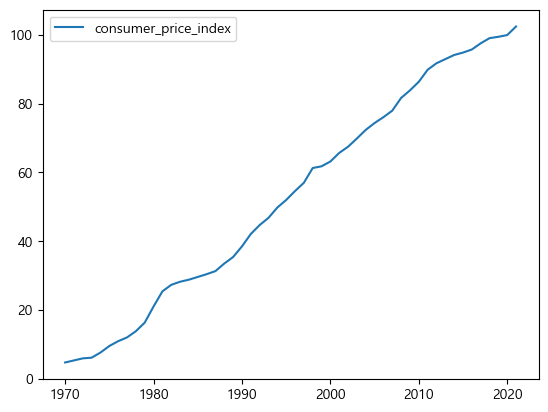

In [381]:
df_consumer_price_index.plot()

In [392]:
# 2017년 1월 ~ 2021년 12월 까지 5년간 행정 구역별 카드소비량 데이터 전처리 과정
# 데이터 출처는 https://kosis.kr/statHtml/statHtml.do?orgId=460&tblId=TX_315_2009_H1001

card_spend = pd.read_excel('card_spend_data.xlsx')
card_spend.head(10)

,사용금액(조원)연월,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,시도코드,11.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0
1,'21.12,15.1,4.2,3.1,3.7,2.0,2.1,1.5,0.6,19.3,1.8,1.9,2.5,2.1,1.9,2.7,3.8,0.9
2,'21.11,15.3,4.3,3.1,3.8,2.1,2.1,1.5,0.6,19.5,1.8,1.9,2.5,2.1,1.9,2.8,3.9,0.9
3,'21.10,14.7,4.2,2.9,3.7,2.0,2.0,1.4,0.5,18.9,1.8,1.9,2.5,2.0,1.8,2.7,3.7,0.9
4,'21.09,14.6,4.1,2.9,3.6,2.0,2.0,1.4,0.5,18.4,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8
5,'21.08,14.2,3.9,2.8,3.5,1.9,1.9,1.3,0.5,18.1,1.7,1.8,2.3,1.9,1.8,2.5,3.5,0.8
6,'21.07,14.5,4.1,2.9,3.6,2.0,1.9,1.4,0.5,18.4,1.7,1.8,2.4,1.9,1.8,2.6,3.7,0.9
7,'21.06,14.1,4.0,2.8,3.5,1.9,1.9,1.3,0.5,17.7,1.7,1.8,2.3,1.9,1.8,2.6,3.6,0.8
8,'21.05,14.4,4.1,2.9,3.5,1.9,2.0,1.4,0.5,18.2,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8
9,'21.04,13.7,3.9,2.8,3.4,1.9,1.9,1.3,0.5,17.6,1.6,1.7,2.3,1.8,1.7,2.5,3.5,0.8


In [393]:
card_spend = card_spend.drop(0)
card_spend.head(10)

,사용금액(조원)연월,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,'21.12,15.1,4.2,3.1,3.7,2.0,2.1,1.5,0.6,19.3,1.8,1.9,2.5,2.1,1.9,2.7,3.8,0.9
2,'21.11,15.3,4.3,3.1,3.8,2.1,2.1,1.5,0.6,19.5,1.8,1.9,2.5,2.1,1.9,2.8,3.9,0.9
3,'21.10,14.7,4.2,2.9,3.7,2.0,2.0,1.4,0.5,18.9,1.8,1.9,2.5,2.0,1.8,2.7,3.7,0.9
4,'21.09,14.6,4.1,2.9,3.6,2.0,2.0,1.4,0.5,18.4,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8
5,'21.08,14.2,3.9,2.8,3.5,1.9,1.9,1.3,0.5,18.1,1.7,1.8,2.3,1.9,1.8,2.5,3.5,0.8
6,'21.07,14.5,4.1,2.9,3.6,2.0,1.9,1.4,0.5,18.4,1.7,1.8,2.4,1.9,1.8,2.6,3.7,0.9
7,'21.06,14.1,4.0,2.8,3.5,1.9,1.9,1.3,0.5,17.7,1.7,1.8,2.3,1.9,1.8,2.6,3.6,0.8
8,'21.05,14.4,4.1,2.9,3.5,1.9,2.0,1.4,0.5,18.2,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8
9,'21.04,13.7,3.9,2.8,3.4,1.9,1.9,1.3,0.5,17.6,1.6,1.7,2.3,1.8,1.7,2.5,3.5,0.8
10,'21.03,14.0,4.1,2.9,3.5,1.9,1.9,1.4,0.5,18.0,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8


In [394]:
seoul = card_spend['서울']
busan = card_spend['부산']
daegu = card_spend['대구']
incheon = card_spend['인천']
gwangju = card_spend['광주']
daejun = card_spend['대전']
ulsan = card_spend['울산']
sejong = card_spend['세종']
gyunggi = card_spend['경기']
gangwon = card_spend['강원']
chungbuk = card_spend['충북']
chungnam = card_spend['충남']
junbuk = card_spend['전북']
junnam = card_spend['전남']
gyungbuk = card_spend['경북']
gyungnam = card_spend['경남']
jaeju = card_spend['제주']
jaeju.head(10)

1     0.9
2     0.9
3     0.9
4     0.8
5     0.8
6     0.9
7     0.8
8     0.8
9     0.8
10    0.8
Name: 제주, dtype: float64

In [395]:
index = card_spend['사용금액(조원)연월'] 
index1 = index
index.head(10)

1     '21.12
2     '21.11
3     '21.10
4     '21.09
5     '21.08
6     '21.07
7     '21.06
8     '21.05
9     '21.04
10    '21.03
Name: 사용금액(조원)연월, dtype: object

In [396]:
cols = card_spend.columns
cols

Index(['사용금액(조원)연월', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기',
       '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'],
      dtype='object')

In [397]:
df_card_spend = card_spend.drop('사용금액(조원)연월' , axis = 1)
df_card_spend

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,15.1,4.2,3.1,3.7,2.0,2.1,1.5,0.6,19.3,1.8,1.9,2.5,2.1,1.9,2.7,3.8,0.9
2,15.3,4.3,3.1,3.8,2.1,2.1,1.5,0.6,19.5,1.8,1.9,2.5,2.1,1.9,2.8,3.9,0.9
3,14.7,4.2,2.9,3.7,2.0,2.0,1.4,0.5,18.9,1.8,1.9,2.5,2.0,1.8,2.7,3.7,0.9
4,14.6,4.1,2.9,3.6,2.0,2.0,1.4,0.5,18.4,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8
5,14.2,3.9,2.8,3.5,1.9,1.9,1.3,0.5,18.1,1.7,1.8,2.3,1.9,1.8,2.5,3.5,0.8
6,14.5,4.1,2.9,3.6,2.0,1.9,1.4,0.5,18.4,1.7,1.8,2.4,1.9,1.8,2.6,3.7,0.9
7,14.1,4.0,2.8,3.5,1.9,1.9,1.3,0.5,17.7,1.7,1.8,2.3,1.9,1.8,2.6,3.6,0.8
8,14.4,4.1,2.9,3.5,1.9,2.0,1.4,0.5,18.2,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8
9,13.7,3.9,2.8,3.4,1.9,1.9,1.3,0.5,17.6,1.6,1.7,2.3,1.8,1.7,2.5,3.5,0.8
10,14.0,4.1,2.9,3.5,1.9,1.9,1.4,0.5,18.0,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8


In [398]:
df_card_spend.index = index
df_card_spend.head(10)

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
사용금액(조원)연월,,,,,,,,,,,,,,,,,
'21.12,15.1,4.2,3.1,3.7,2.0,2.1,1.5,0.6,19.3,1.8,1.9,2.5,2.1,1.9,2.7,3.8,0.9
'21.11,15.3,4.3,3.1,3.8,2.1,2.1,1.5,0.6,19.5,1.8,1.9,2.5,2.1,1.9,2.8,3.9,0.9
'21.10,14.7,4.2,2.9,3.7,2.0,2.0,1.4,0.5,18.9,1.8,1.9,2.5,2.0,1.8,2.7,3.7,0.9
'21.09,14.6,4.1,2.9,3.6,2.0,2.0,1.4,0.5,18.4,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8
'21.08,14.2,3.9,2.8,3.5,1.9,1.9,1.3,0.5,18.1,1.7,1.8,2.3,1.9,1.8,2.5,3.5,0.8
'21.07,14.5,4.1,2.9,3.6,2.0,1.9,1.4,0.5,18.4,1.7,1.8,2.4,1.9,1.8,2.6,3.7,0.9
'21.06,14.1,4.0,2.8,3.5,1.9,1.9,1.3,0.5,17.7,1.7,1.8,2.3,1.9,1.8,2.6,3.6,0.8
'21.05,14.4,4.1,2.9,3.5,1.9,2.0,1.4,0.5,18.2,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8
'21.04,13.7,3.9,2.8,3.4,1.9,1.9,1.3,0.5,17.6,1.6,1.7,2.3,1.8,1.7,2.5,3.5,0.8


In [401]:
# 인구수 데이터 전처리 과정
# 데이터 출처는 https://jumin.mois.go.kr/

In [402]:
po_data_1 = pd.read_csv('po_data.csv' , encoding = 'cp949')
po_data_1.head(10)

,행정구역,2017년01월_총인구수,2017년01월_세대수,2017년01월_세대당 인구,2017년01월_남자 인구수,2017년01월_여자 인구수,2017년01월_남여 비율,2017년02월_총인구수,2017년02월_세대수,2017년02월_세대당 인구,...,2019년11월_세대당 인구,2019년11월_남자 인구수,2019년11월_여자 인구수,2019년11월_남여 비율,2019년12월_총인구수,2019년12월_세대수,2019년12월_세대당 인구,2019년12월_남자 인구수,2019년12월_여자 인구수,2019년12월_남여 비율
0,전국,51704332,21312864,2.43,25830890,25873442,1.00,51712221,21352287,2.42,...,2.31,25866604,25984823,1.00,51849861,22481466,2.31,25864816,25985045,1.00
1,서울,9930478,4192985,2.37,4875745,5054733,0.96,9931412,4200761,2.36,...,2.25,4746636,4985941,0.95,9729107,4327605,2.25,4744059,4985048,0.95
2,부산,3496779,1452162,2.41,1724481,1772298,0.97,3495478,1454891,2.40,...,2.28,1677165,1739556,0.96,3413841,1497908,2.28,1675417,1738424,0.96
3,대구,2484688,995376,2.50,1234155,1250533,0.99,2484578,997275,2.49,...,2.37,1207318,1234263,0.98,2438031,1031251,2.36,1205286,1232745,0.98
4,인천,2944009,1172392,2.51,1478103,1465906,1.01,2944266,1174178,2.51,...,2.39,1482519,1474730,1.01,2957026,1238641,2.39,1482249,1474777,1.01
5,광주,1469583,586957,2.50,728408,741175,0.98,1468527,587518,2.50,...,2.37,722168,736747,0.98,1456468,616485,2.36,720740,735728,0.98
6,대전,1514354,607090,2.49,757142,757212,1.00,1513877,608763,2.49,...,2.33,737607,739348,1.00,1474870,635343,2.32,736607,738263,1.00
7,울산,1171656,455430,2.57,603471,568185,1.06,1169957,455624,2.57,...,2.45,590098,558824,1.06,1148019,468659,2.45,589712,558307,1.06
8,세종,244939,95032,2.58,122451,122488,1.00,247600,95975,2.58,...,2.52,168916,169731,1.00,340575,135408,2.52,169845,170730,0.99
9,경기,12728620,5010895,2.54,6401310,6327310,1.01,12741266,5022352,2.54,...,2.42,6654571,6573606,1.01,13239666,5468920,2.42,6659995,6579671,1.01


In [403]:
po_data_1 = po_data_1.drop(0)
po_data_1.head(10)

,행정구역,2017년01월_총인구수,2017년01월_세대수,2017년01월_세대당 인구,2017년01월_남자 인구수,2017년01월_여자 인구수,2017년01월_남여 비율,2017년02월_총인구수,2017년02월_세대수,2017년02월_세대당 인구,...,2019년11월_세대당 인구,2019년11월_남자 인구수,2019년11월_여자 인구수,2019년11월_남여 비율,2019년12월_총인구수,2019년12월_세대수,2019년12월_세대당 인구,2019년12월_남자 인구수,2019년12월_여자 인구수,2019년12월_남여 비율
1,서울,9930478,4192985,2.37,4875745,5054733,0.96,9931412,4200761,2.36,...,2.25,4746636,4985941,0.95,9729107,4327605,2.25,4744059,4985048,0.95
2,부산,3496779,1452162,2.41,1724481,1772298,0.97,3495478,1454891,2.40,...,2.28,1677165,1739556,0.96,3413841,1497908,2.28,1675417,1738424,0.96
3,대구,2484688,995376,2.50,1234155,1250533,0.99,2484578,997275,2.49,...,2.37,1207318,1234263,0.98,2438031,1031251,2.36,1205286,1232745,0.98
4,인천,2944009,1172392,2.51,1478103,1465906,1.01,2944266,1174178,2.51,...,2.39,1482519,1474730,1.01,2957026,1238641,2.39,1482249,1474777,1.01
5,광주,1469583,586957,2.50,728408,741175,0.98,1468527,587518,2.50,...,2.37,722168,736747,0.98,1456468,616485,2.36,720740,735728,0.98
6,대전,1514354,607090,2.49,757142,757212,1.00,1513877,608763,2.49,...,2.33,737607,739348,1.00,1474870,635343,2.32,736607,738263,1.00
7,울산,1171656,455430,2.57,603471,568185,1.06,1169957,455624,2.57,...,2.45,590098,558824,1.06,1148019,468659,2.45,589712,558307,1.06
8,세종,244939,95032,2.58,122451,122488,1.00,247600,95975,2.58,...,2.52,168916,169731,1.00,340575,135408,2.52,169845,170730,0.99
9,경기,12728620,5010895,2.54,6401310,6327310,1.01,12741266,5022352,2.54,...,2.42,6654571,6573606,1.01,13239666,5468920,2.42,6659995,6579671,1.01
10,강원,1549212,691762,2.24,780219,768993,1.01,1548252,692316,2.24,...,2.15,775250,766149,1.01,1541502,719524,2.14,775386,766116,1.01


In [404]:
po_17_01 = po_data_1['2017년01월_총인구수']
po_17_02 = po_data_1['2017년02월_총인구수']
po_17_03 = po_data_1['2017년03월_총인구수']
po_17_04 = po_data_1['2017년04월_총인구수']
po_17_05 = po_data_1['2017년05월_총인구수']
po_17_06 = po_data_1['2017년06월_총인구수']
po_17_07 = po_data_1['2017년07월_총인구수']
po_17_08 = po_data_1['2017년08월_총인구수']
po_17_09 = po_data_1['2017년09월_총인구수']
po_17_10 = po_data_1['2017년10월_총인구수']
po_17_11 = po_data_1['2017년11월_총인구수']
po_17_12 = po_data_1['2017년12월_총인구수']
po_18_01 = po_data_1['2018년01월_총인구수']
po_18_02 = po_data_1['2018년02월_총인구수']
po_18_03 = po_data_1['2018년03월_총인구수']
po_18_04 = po_data_1['2018년04월_총인구수']
po_18_05 = po_data_1['2018년05월_총인구수']
po_18_06 = po_data_1['2018년06월_총인구수']
po_18_07 = po_data_1['2018년07월_총인구수']
po_18_08 = po_data_1['2018년08월_총인구수']
po_18_09 = po_data_1['2018년09월_총인구수']
po_18_10 = po_data_1['2018년10월_총인구수']
po_18_11 = po_data_1['2018년11월_총인구수']
po_18_12 = po_data_1['2018년12월_총인구수']
po_19_01 = po_data_1['2019년01월_총인구수']
po_19_02 = po_data_1['2019년02월_총인구수']
po_19_03 = po_data_1['2019년03월_총인구수']
po_19_04 = po_data_1['2019년04월_총인구수']
po_19_05 = po_data_1['2019년05월_총인구수']
po_19_06 = po_data_1['2019년06월_총인구수']
po_19_07 = po_data_1['2019년07월_총인구수']
po_19_08 = po_data_1['2019년08월_총인구수']
po_19_09 = po_data_1['2019년09월_총인구수']
po_19_10 = po_data_1['2019년10월_총인구수']
po_19_11 = po_data_1['2019년11월_총인구수']
po_19_12 = po_data_1['2019년12월_총인구수']
po_19_12

1      9729107
2      3413841
3      2438031
4      2957026
5      1456468
6      1474870
7      1148019
8       340575
9     13239666
10     1541502
11     1600007
12     2123709
13     1818917
14     1868745
15     2665836
16     3362553
17      670989
Name: 2019년12월_총인구수, dtype: int64

In [405]:
po_data_2 = pd.read_csv('po_data1.csv' , encoding = 'cp949')
po_data_2

,행정구역,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,2020년02월_총인구수,2020년02월_세대수,2020년02월_세대당 인구,...,2021년11월_세대당 인구,2021년11월_남자 인구수,2021년11월_여자 인구수,2021년11월_남여 비율,2021년12월_총인구수,2021년12월_세대수,2021년12월_세대당 인구,2021년12월_남자 인구수,2021년12월_여자 인구수,2021년12월_남여 비율
0,전국,51847509,22513039,2.30,25862863,25984646,1.00,51844627,22561161,2.30,...,2.20,25754446,25898258,0.99,51638809,23472895,2.20,25746684,25892125,0.99
1,서울,9733509,4334918,2.25,4745088,4988421,0.95,9736962,4345877,2.24,...,2.15,4624290,4896590,0.94,9509458,4426007,2.15,4618040,4891418,0.94
2,부산,3411819,1499152,2.28,1674202,1737617,0.96,3410925,1502333,2.27,...,2.17,1640867,1712760,0.96,3350380,1544663,2.17,1639044,1711336,0.96
3,대구,2436488,1032478,2.36,1204387,1232101,0.98,2432883,1033349,2.35,...,2.25,1177136,1211094,0.97,2385412,1063893,2.24,1175632,1209780,0.97
4,인천,2956119,1239915,2.38,1481749,1474370,1.01,2954955,1242107,2.38,...,2.27,1475245,1471074,1.00,2948375,1298647,2.27,1476373,1472002,1.00
5,광주,1456688,617379,2.36,720931,735757,0.98,1456121,618503,2.35,...,2.24,713292,728846,0.98,1441611,645712,2.23,713015,728596,0.98
6,대전,1474152,636203,2.32,736259,737893,1.00,1473125,637726,2.31,...,2.19,725406,728269,1.00,1452251,664417,2.19,724626,727625,1.00
7,울산,1147037,469007,2.45,589233,557804,1.06,1145710,469551,2.44,...,2.33,576636,545859,1.06,1121592,482650,2.32,576217,545375,1.06
8,세종,342328,136056,2.52,170729,171599,0.99,343788,136629,2.52,...,2.43,184441,185024,1.00,371895,153649,2.42,185678,186217,1.00
9,경기,13250368,5480444,2.42,6665310,6585058,1.01,13265377,5497087,2.41,...,2.32,6823931,6734042,1.01,13565450,5841995,2.32,6827298,6738152,1.01


In [406]:
po_data_2 = po_data_2.drop(0)
po_data_2

,행정구역,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,2020년02월_총인구수,2020년02월_세대수,2020년02월_세대당 인구,...,2021년11월_세대당 인구,2021년11월_남자 인구수,2021년11월_여자 인구수,2021년11월_남여 비율,2021년12월_총인구수,2021년12월_세대수,2021년12월_세대당 인구,2021년12월_남자 인구수,2021년12월_여자 인구수,2021년12월_남여 비율
1,서울,9733509,4334918,2.25,4745088,4988421,0.95,9736962,4345877,2.24,...,2.15,4624290,4896590,0.94,9509458,4426007,2.15,4618040,4891418,0.94
2,부산,3411819,1499152,2.28,1674202,1737617,0.96,3410925,1502333,2.27,...,2.17,1640867,1712760,0.96,3350380,1544663,2.17,1639044,1711336,0.96
3,대구,2436488,1032478,2.36,1204387,1232101,0.98,2432883,1033349,2.35,...,2.25,1177136,1211094,0.97,2385412,1063893,2.24,1175632,1209780,0.97
4,인천,2956119,1239915,2.38,1481749,1474370,1.01,2954955,1242107,2.38,...,2.27,1475245,1471074,1.00,2948375,1298647,2.27,1476373,1472002,1.00
5,광주,1456688,617379,2.36,720931,735757,0.98,1456121,618503,2.35,...,2.24,713292,728846,0.98,1441611,645712,2.23,713015,728596,0.98
6,대전,1474152,636203,2.32,736259,737893,1.00,1473125,637726,2.31,...,2.19,725406,728269,1.00,1452251,664417,2.19,724626,727625,1.00
7,울산,1147037,469007,2.45,589233,557804,1.06,1145710,469551,2.44,...,2.33,576636,545859,1.06,1121592,482650,2.32,576217,545375,1.06
8,세종,342328,136056,2.52,170729,171599,0.99,343788,136629,2.52,...,2.43,184441,185024,1.00,371895,153649,2.42,185678,186217,1.00
9,경기,13250368,5480444,2.42,6665310,6585058,1.01,13265377,5497087,2.41,...,2.32,6823931,6734042,1.01,13565450,5841995,2.32,6827298,6738152,1.01
10,강원,1540540,720119,2.14,774866,765674,1.01,1539521,721003,2.14,...,2.06,774232,764041,1.01,1538492,746220,2.06,774332,764160,1.01


In [407]:
po_20_01 = po_data_2['2020년01월_총인구수']
po_20_02 = po_data_2['2020년02월_총인구수']
po_20_03 = po_data_2['2020년03월_총인구수']
po_20_04 = po_data_2['2020년04월_총인구수']
po_20_05 = po_data_2['2020년05월_총인구수']
po_20_06 = po_data_2['2020년06월_총인구수']
po_20_07 = po_data_2['2020년07월_총인구수']
po_20_08 = po_data_2['2020년08월_총인구수']
po_20_09 = po_data_2['2020년09월_총인구수']
po_20_10 = po_data_2['2020년10월_총인구수']
po_20_11 = po_data_2['2020년11월_총인구수']
po_20_12 = po_data_2['2020년12월_총인구수']
po_21_01 = po_data_2['2021년01월_총인구수']
po_21_02 = po_data_2['2021년02월_총인구수']
po_21_03 = po_data_2['2021년03월_총인구수']
po_21_04 = po_data_2['2021년04월_총인구수']
po_21_05 = po_data_2['2021년05월_총인구수']
po_21_06 = po_data_2['2021년06월_총인구수']
po_21_07 = po_data_2['2021년07월_총인구수']
po_21_08 = po_data_2['2021년08월_총인구수']
po_21_09 = po_data_2['2021년09월_총인구수']
po_21_10 = po_data_2['2021년10월_총인구수']
po_21_11 = po_data_2['2021년11월_총인구수']
po_21_12 = po_data_2['2021년12월_총인구수']
po_21_12

1      9509458
2      3350380
3      2385412
4      2948375
5      1441611
6      1452251
7      1121592
8       371895
9     13565450
10     1538492
11     1597427
12     2119257
13     1786855
14     1832803
15     2626609
16     3314183
17      676759
Name: 2021년12월_총인구수, dtype: int64

In [408]:
index = po_data_2['행정구역'] 
col_names = list(index1)
col_names.reverse()
col_names

["'17.01",
 "'17.02",
 "'17.03",
 "'17.04",
 "'17.05",
 "'17.06",
 "'17.07",
 "'17.08",
 "'17.09",
 "'17.10",
 "'17.11",
 "'17.12",
 "'18.01",
 "'18.02",
 "'18.03",
 "'18.04",
 "'18.05",
 "'18.06",
 "'18.07",
 "'18.08",
 "'18.09",
 "'18.10",
 "'18.11",
 "'18.12",
 "'19.01",
 "'19.02",
 "'19.03",
 "'19.04",
 "'19.05",
 "'19.06",
 "'19.07",
 "'19.08",
 "'19.09",
 "'19.10",
 "'19.11",
 "'19.12",
 "'20.01",
 "'20.02",
 "'20.03",
 "'20.04",
 "'20.05",
 "'20.06",
 "'20.07",
 "'20.08",
 "'20.09",
 "'20.10",
 "'20.11",
 "'20.12",
 "'21.01",
 "'21.02",
 "'21.03",
 "'21.04",
 "'21.05",
 "'21.06",
 "'21.07",
 "'21.08",
 "'21.09",
 "'21.10",
 "'21.11",
 "'21.12"]

In [409]:
df_population_data = pd.DataFrame([po_17_01 , po_17_02 , po_17_03 , po_17_04 , po_17_05 , po_17_06 , po_17_07 , po_17_08 , po_17_09 , po_17_10 , po_17_11 , po_17_12 ,
                                   po_18_01 , po_18_02 , po_18_03 , po_18_04 , po_18_05 , po_18_06 , po_18_07 , po_18_08 , po_18_09 , po_18_10 , po_18_11 , po_18_12 ,
                                   po_19_01 , po_19_02 , po_19_03 , po_19_04 , po_19_05 , po_19_06 , po_19_07 , po_19_08 , po_19_09 , po_19_10 , po_19_11 , po_19_12 , 
                                   po_20_01 , po_20_02 , po_20_03 , po_20_04 , po_20_05 , po_20_06 , po_20_07 , po_20_08 , po_20_09 , po_20_10 , po_20_11 , po_20_12 , 
                                   po_21_01 , po_21_02 , po_21_03 , po_21_04 , po_21_05 , po_21_06 , po_21_07 , po_21_08 , po_21_09 , po_21_10 , po_21_11 , po_21_12] ,
                                 )

df_population_data.columns = ['서울 인구' , '부산 인구' , '대구 인구' , '인천 인구' , '광주 인구' , '대전 인구' , '울산 인구' , '세종 인구' , '경기 인구' ,
                         '강원 인구' , '충북 인구' , '충남 인구' , '전북 인구' , '전남 인구' , '경북 인구' , '경남 인구' , '제주 인구']
df_population_data.index = col_names
df_population_data

,서울 인구,부산 인구,대구 인구,인천 인구,광주 인구,대전 인구,울산 인구,세종 인구,경기 인구,강원 인구,충북 인구,충남 인구,전북 인구,전남 인구,경북 인구,경남 인구,제주 인구
'17.01,9930478,3496779,2484688,2944009,1469583,1514354,1171656,244939,12728620,1549212,1591674,2097406,1863298,1902380,2698803,3374065,642388
'17.02,9931412,3495478,2484578,2944266,1468527,1513877,1169957,247600,12741266,1548252,1592001,2099924,1861955,1900797,2696329,3372266,643736
'17.03,9926968,3493041,2483488,2944630,1467766,1512189,1168843,251178,12753983,1547735,1591697,2102327,1860485,1899441,2694544,3371696,644924
'17.04,9922745,3491282,2483105,2945305,1467002,1511396,1168501,254112,12763961,1547579,1592492,2104463,1859703,1899604,2693810,3371703,646140
'17.05,9919016,3489212,2482476,2946270,1466741,1509587,1167960,259157,12775175,1547453,1592573,2105959,1858927,1899088,2692859,3372586,647547
'17.06,9914381,3486570,2481985,2946915,1466451,1508137,1167525,263056,12783741,1547829,1592634,2107562,1857815,1898065,2691727,3373334,648497
'17.07,9908612,3484836,2481489,2947803,1466415,1507597,1166942,266075,12795378,1547387,1592817,2109230,1856921,1897681,2690974,3374601,650190
'17.08,9902072,3484183,2479887,2948014,1466642,1507116,1165909,269102,12810014,1547455,1593022,2111419,1855985,1895974,2690671,3374467,651888
'17.09,9891448,3482804,2478236,2947298,1466639,1506741,1165385,271410,12827633,1547768,1593313,2113033,1855450,1895233,2691502,3375329,653270
'17.10,9882810,3478109,2477186,2948098,1466716,1505829,1165528,274092,12841321,1547999,1593577,2114284,1854688,1894676,2691794,3377635,654750


<Axes: >

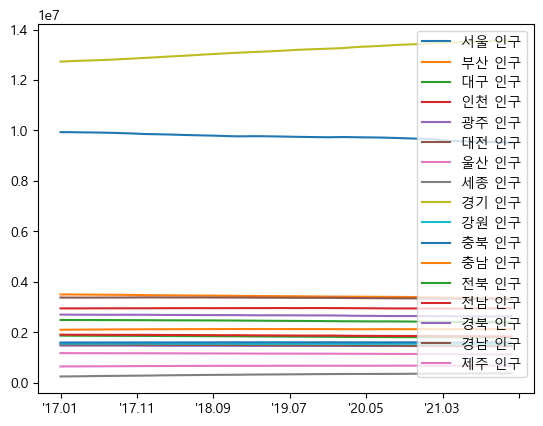

In [410]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
df_population_data.plot()

In [411]:
# 2023년 월별 인구수 자료
# 2023년은 국가에서 발표한 장래 인구에 각 지역별 인구 비율을 나눠서 선정
# 가장 최신의 인구 데이터를 사용(2022.09)

In [412]:
total = 51466658
seoul_ratio = 9450768 / total  
busan_ratio = 3323826 / total
daegu_ratio = 2367735 / total
incheon_ratio = 2960097 / total
gwangju_ratio = 1432856 / total
daejun_ratio = 1446602 / total
ulsan_ratio = 1112191 / total
sejong_ratio = 381925 / total
gyunggi_ratio = 13574353 / total
gangwon_ratio = 1537396 / total
chungbuk_ratio = 1595624 / total
chungnam_ratio = 2120269 / total
junbuk_ratio = 1772596 / total
junnam_ratio = 1820458 / total
gyungbuk_ratio = 2605066 / total
gyungnam_ratio = 3286470 / total
jaeju_ratio = 678426 / total

total_2023 = 51558000    # 2023년 장래인구
seoul_2023 = round(51558000 * seoul_ratio)
busan_2023 = round(51558000 * busan_ratio)
daegu_2023 = round(51558000 * daegu_ratio)
incheon_2023 = round(51558000 * incheon_ratio)
gwangju_2023 = round(51558000 * gwangju_ratio)
daejun_2023 = round(51558000 * daejun_ratio)
ulsan_2023 = round(51558000 * ulsan_ratio)
sejong_2023 = round(51558000 * sejong_ratio)
gyunggi_2023 = round(51558000 * gyunggi_ratio)
gangwon_2023 = round(51558000 * gangwon_ratio)
chungbuk_2023 = round(51558000 * chungbuk_ratio)
chungnam_2023 = round(51558000 * chungnam_ratio)
junbuk_2023 = round(51558000 * junbuk_ratio)
junnam_2023 = round(51558000 * junnam_ratio)
gyungbuk_2023 = round(51558000 * gyungbuk_ratio)
gyungnam_2023 = round(51558000 * gyungnam_ratio)
jaeju_2023 = round(51558000 * jaeju_ratio)

In [413]:
# 이러면 1월부터 12월까지 2023년 지역별로 인구가 모두 같게되어 난수 생성
# 서울 경기는 오차 10000 , 나머지 지역은 4000 , 제주는 1000으로 설정
# 경기도는 계속 늘어나는 추세여서 - 는 고려하지 않음

In [414]:
np.random.seed(0)
seoul_monthly_2023 = np.random.randint(seoul_2023 - 10000 , seoul_2023 + 10000 , 12)
busan_monthly_2023 = np.random.randint(busan_2023 - 4000 , busan_2023 + 4000 , 12)
daegu_monthly_2023 = np.random.randint(daegu_2023 - 4000 , daegu_2023 + 4000 , 12)
incheon_monthly_2023 = np.random.randint(incheon_2023 - 4000 , incheon_2023 + 4000 , 12)
gwangju_monthly_2023 = np.random.randint(gwangju_2023 - 4000 , gwangju_2023 + 4000 , 12)
daejun_monthly_2023 = np.random.randint(daejun_2023 - 4000 , daejun_2023 + 4000 , 12)
ulsan_monthly_2023 = np.random.randint(ulsan_2023 - 4000 , ulsan_2023 + 4000 , 12)
sejong_monthly_2023 = np.random.randint(sejong_2023 - 4000 , sejong_2023 + 4000 , 12)
gyunggi_monthly_2023 = np.random.randint(gyunggi_2023 , gyunggi_2023 + 10000 , 12)
gangwon_monthly_2023 = np.random.randint(gangwon_2023 - 4000 , gangwon_2023 + 4000 , 12)
chungbuk_monthly_2023 = np.random.randint(chungbuk_2023 - 4000 , chungbuk_2023 + 4000 , 12)
chungnam_monthly_2023 = np.random.randint(chungnam_2023 - 4000 , chungnam_2023 + 4000 , 12)
junbuk_monthly_2023 = np.random.randint(junbuk_2023 - 4000 , junbuk_2023 + 4000 , 12)
junnam_monthly_2023 = np.random.randint(junnam_2023 - 4000 , junnam_2023 + 40000 , 12)
gyungbuk_monthly_2023 = np.random.randint(gyungbuk_2023 - 4000 , gyungbuk_2023 + 4000 , 12)
gyungnam_monthly_2023 = np.random.randint(gyungnam_2023 - 4000 , gyungnam_2023 + 4000 , 12)
jaeju_monthly_2023 = np.random.randint(jaeju_2023 - 1000 , jaeju_2023 + 1000 , 12)

In [415]:
# 2023 지역별 월별 인구수 데이터 프레임으로 만드는 과정

population_2023 = pd.DataFrame([seoul_monthly_2023 , busan_monthly_2023 , daegu_monthly_2023 , incheon_monthly_2023 ,
                                gwangju_monthly_2023 , daejun_monthly_2023 , ulsan_monthly_2023 , sejong_monthly_2023 , 
                                gyunggi_monthly_2023 , gangwon_monthly_2023 , chungbuk_monthly_2023 , chungnam_monthly_2023 ,
                                junbuk_monthly_2023 , junnam_monthly_2023 , gyungbuk_monthly_2023 , gyungnam_monthly_2023 ,
                                jaeju_monthly_2023])
population_2023.index = ['서울 인구' , '부산 인구' , '대구 인구' , '인천 인구' , '광주 인구' , '대전 인구' , '울산 인구' , '세종 인구' , '경기 인구' ,
                         '강원 인구' , '충북 인구' , '충남 인구' , '전북 인구' , '전남 인구' , '경북 인구' , '경남 인구' , '제주 인구']
population_2023.columns = ['23.01' , '23.02' , '23.03' , '23.04' , '23.05' , '23.06' , '23.07' , '23.08' , '23.09' , '23.10' , '23.11' , '23.12']
population_2023 = population_2023.transpose()
population_2023

,서울 인구,부산 인구,대구 인구,인천 인구,광주 인구,대전 인구,울산 인구,세종 인구,경기 인구,강원 인구,충북 인구,충남 인구,전북 인구,전남 인구,경북 인구,경남 인구,제주 인구
23.01,9460273,3332183,2374858,2963359,1431943,1447345,1113279,385526,13602864,1542098,1598218,2122463,1779484,1842999,2612639,3289073,680064
23.02,9468340,3326430,2373973,2968696,1438086,1447345,1115727,379033,13605552,1536685,1599868,2125664,1772673,1851474,2605964,3295986,679080
23.03,9467386,3333379,2370100,2962106,1432113,1447125,1116852,385853,13599515,1541550,1596410,2126058,1778620,1834730,2610983,3288397,679902
23.04,9477189,3328324,2373009,2962148,1433691,1452390,1115149,382790,13603695,1537730,1595272,2122450,1778009,1842995,2611363,3291601,678810
23.05,9470664,3327860,2372788,2962010,1431550,1451190,1114518,384619,13605456,1542438,1596891,2124683,1773729,1856639,2611180,3294298,678953
23.06,9466766,3327947,2375814,2964570,1434122,1448791,1115606,381049,13607840,1541920,1596090,2125082,1778480,1832849,2606897,3295740,679634
23.07,9471657,3333493,2369983,2968405,1438053,1448729,1114236,381262,13602362,1537597,1602178,2123487,1777804,1846324,2608181,3294303,680483
23.08,9472476,3328622,2369808,2961774,1434930,1445925,1114174,380192,13607803,1543388,1595429,2126199,1774529,1852764,2608225,3290647,680436
23.09,9472971,3327426,2375536,2968807,1434329,1449538,1112270,381559,13600128,1543490,1598920,2125851,1779058,1833081,2613446,3293751,680518
23.10,9473373,3326262,2370433,2964688,1432606,1451648,1116600,381284,13605542,1539803,1596479,2124258,1776047,1834057,2612119,3291394,679914


In [416]:
# 데이터 총 집합

In [417]:
df_gdp.tail(10)

,gdp
2012,1440111.4
2013,1500819.1
2014,1562928.9
2015,1658020.4
2016,1740779.6
2017,1835698.2
2018,1898192.6
2019,1924498.1
2020,1940726.2
2021,2071658.0


In [418]:
df_consumer_price_index.tail(10)

,consumer_price_index
2012,91.8
2013,93.0
2014,94.2
2015,94.9
2016,95.8
2017,97.6
2018,99.1
2019,99.5
2020,100.0
2021,102.5


In [419]:
df_card_spend.head(10)

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
사용금액(조원)연월,,,,,,,,,,,,,,,,,
'21.12,15.1,4.2,3.1,3.7,2.0,2.1,1.5,0.6,19.3,1.8,1.9,2.5,2.1,1.9,2.7,3.8,0.9
'21.11,15.3,4.3,3.1,3.8,2.1,2.1,1.5,0.6,19.5,1.8,1.9,2.5,2.1,1.9,2.8,3.9,0.9
'21.10,14.7,4.2,2.9,3.7,2.0,2.0,1.4,0.5,18.9,1.8,1.9,2.5,2.0,1.8,2.7,3.7,0.9
'21.09,14.6,4.1,2.9,3.6,2.0,2.0,1.4,0.5,18.4,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8
'21.08,14.2,3.9,2.8,3.5,1.9,1.9,1.3,0.5,18.1,1.7,1.8,2.3,1.9,1.8,2.5,3.5,0.8
'21.07,14.5,4.1,2.9,3.6,2.0,1.9,1.4,0.5,18.4,1.7,1.8,2.4,1.9,1.8,2.6,3.7,0.9
'21.06,14.1,4.0,2.8,3.5,1.9,1.9,1.3,0.5,17.7,1.7,1.8,2.3,1.9,1.8,2.6,3.6,0.8
'21.05,14.4,4.1,2.9,3.5,1.9,2.0,1.4,0.5,18.2,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8
'21.04,13.7,3.9,2.8,3.4,1.9,1.9,1.3,0.5,17.6,1.6,1.7,2.3,1.8,1.7,2.5,3.5,0.8


In [420]:
df_population_data.head(10)

,서울 인구,부산 인구,대구 인구,인천 인구,광주 인구,대전 인구,울산 인구,세종 인구,경기 인구,강원 인구,충북 인구,충남 인구,전북 인구,전남 인구,경북 인구,경남 인구,제주 인구
'17.01,9930478,3496779,2484688,2944009,1469583,1514354,1171656,244939,12728620,1549212,1591674,2097406,1863298,1902380,2698803,3374065,642388
'17.02,9931412,3495478,2484578,2944266,1468527,1513877,1169957,247600,12741266,1548252,1592001,2099924,1861955,1900797,2696329,3372266,643736
'17.03,9926968,3493041,2483488,2944630,1467766,1512189,1168843,251178,12753983,1547735,1591697,2102327,1860485,1899441,2694544,3371696,644924
'17.04,9922745,3491282,2483105,2945305,1467002,1511396,1168501,254112,12763961,1547579,1592492,2104463,1859703,1899604,2693810,3371703,646140
'17.05,9919016,3489212,2482476,2946270,1466741,1509587,1167960,259157,12775175,1547453,1592573,2105959,1858927,1899088,2692859,3372586,647547
'17.06,9914381,3486570,2481985,2946915,1466451,1508137,1167525,263056,12783741,1547829,1592634,2107562,1857815,1898065,2691727,3373334,648497
'17.07,9908612,3484836,2481489,2947803,1466415,1507597,1166942,266075,12795378,1547387,1592817,2109230,1856921,1897681,2690974,3374601,650190
'17.08,9902072,3484183,2479887,2948014,1466642,1507116,1165909,269102,12810014,1547455,1593022,2111419,1855985,1895974,2690671,3374467,651888
'17.09,9891448,3482804,2478236,2947298,1466639,1506741,1165385,271410,12827633,1547768,1593313,2113033,1855450,1895233,2691502,3375329,653270
'17.10,9882810,3478109,2477186,2948098,1466716,1505829,1165528,274092,12841321,1547999,1593577,2114284,1854688,1894676,2691794,3377635,654750


In [421]:
# 데이터 프레임 합치기

In [422]:
gdp_2017 = [df_gdp.loc['2017']] * 12
gdp_2018 = [df_gdp.loc['2018']] * 12
gdp_2019 = [df_gdp.loc['2019']] * 12
gdp_2020 = [df_gdp.loc['2020']] * 12
gdp_2021 = [df_gdp.loc['2021']] * 12

gdp_5years = pd.DataFrame(np.array(gdp_2017 + gdp_2018 + gdp_2019 + gdp_2020 + gdp_2021))
gdp_5years.columns = ['gdp']
gdp_5years.index = col_names
gdp_5years

,gdp
'17.01,1835698.2
'17.02,1835698.2
'17.03,1835698.2
'17.04,1835698.2
'17.05,1835698.2
'17.06,1835698.2
'17.07,1835698.2
'17.08,1835698.2
'17.09,1835698.2
'17.10,1835698.2


In [423]:
whole_data = pd.concat([df_population_data , gdp_5years] , axis = 1)
whole_data.head(10)

,서울 인구,부산 인구,대구 인구,인천 인구,광주 인구,대전 인구,울산 인구,세종 인구,경기 인구,강원 인구,충북 인구,충남 인구,전북 인구,전남 인구,경북 인구,경남 인구,제주 인구,gdp
'17.01,9930478,3496779,2484688,2944009,1469583,1514354,1171656,244939,12728620,1549212,1591674,2097406,1863298,1902380,2698803,3374065,642388,1835698.2
'17.02,9931412,3495478,2484578,2944266,1468527,1513877,1169957,247600,12741266,1548252,1592001,2099924,1861955,1900797,2696329,3372266,643736,1835698.2
'17.03,9926968,3493041,2483488,2944630,1467766,1512189,1168843,251178,12753983,1547735,1591697,2102327,1860485,1899441,2694544,3371696,644924,1835698.2
'17.04,9922745,3491282,2483105,2945305,1467002,1511396,1168501,254112,12763961,1547579,1592492,2104463,1859703,1899604,2693810,3371703,646140,1835698.2
'17.05,9919016,3489212,2482476,2946270,1466741,1509587,1167960,259157,12775175,1547453,1592573,2105959,1858927,1899088,2692859,3372586,647547,1835698.2
'17.06,9914381,3486570,2481985,2946915,1466451,1508137,1167525,263056,12783741,1547829,1592634,2107562,1857815,1898065,2691727,3373334,648497,1835698.2
'17.07,9908612,3484836,2481489,2947803,1466415,1507597,1166942,266075,12795378,1547387,1592817,2109230,1856921,1897681,2690974,3374601,650190,1835698.2
'17.08,9902072,3484183,2479887,2948014,1466642,1507116,1165909,269102,12810014,1547455,1593022,2111419,1855985,1895974,2690671,3374467,651888,1835698.2
'17.09,9891448,3482804,2478236,2947298,1466639,1506741,1165385,271410,12827633,1547768,1593313,2113033,1855450,1895233,2691502,3375329,653270,1835698.2
'17.10,9882810,3478109,2477186,2948098,1466716,1505829,1165528,274092,12841321,1547999,1593577,2114284,1854688,1894676,2691794,3377635,654750,1835698.2


In [424]:
cpi_2017 = [df_consumer_price_index.loc[2017]] * 12
cpi_2018 = [df_consumer_price_index.loc[2018]] * 12
cpi_2019 = [df_consumer_price_index.loc[2019]] * 12
cpi_2020 = [df_consumer_price_index.loc[2020]] * 12
cpi_2021 = [df_consumer_price_index.loc[2021]] * 12

cpi_5years = np.array(cpi_2017 + cpi_2018 + cpi_2019 + cpi_2020 + cpi_2021)
cpi_5years = pd.DataFrame(cpi_5years)
cpi_5years.columns = ['consumer_price_index']
cpi_5years.index = col_names
cpi_5years

,consumer_price_index
'17.01,97.6
'17.02,97.6
'17.03,97.6
'17.04,97.6
'17.05,97.6
'17.06,97.6
'17.07,97.6
'17.08,97.6
'17.09,97.6
'17.10,97.6


In [425]:
whole_data = pd.concat([whole_data , cpi_5years] , axis = 1)
whole_data

,서울 인구,부산 인구,대구 인구,인천 인구,광주 인구,대전 인구,울산 인구,세종 인구,경기 인구,강원 인구,충북 인구,충남 인구,전북 인구,전남 인구,경북 인구,경남 인구,제주 인구,gdp,consumer_price_index
'17.01,9930478,3496779,2484688,2944009,1469583,1514354,1171656,244939,12728620,1549212,1591674,2097406,1863298,1902380,2698803,3374065,642388,1835698.2,97.6
'17.02,9931412,3495478,2484578,2944266,1468527,1513877,1169957,247600,12741266,1548252,1592001,2099924,1861955,1900797,2696329,3372266,643736,1835698.2,97.6
'17.03,9926968,3493041,2483488,2944630,1467766,1512189,1168843,251178,12753983,1547735,1591697,2102327,1860485,1899441,2694544,3371696,644924,1835698.2,97.6
'17.04,9922745,3491282,2483105,2945305,1467002,1511396,1168501,254112,12763961,1547579,1592492,2104463,1859703,1899604,2693810,3371703,646140,1835698.2,97.6
'17.05,9919016,3489212,2482476,2946270,1466741,1509587,1167960,259157,12775175,1547453,1592573,2105959,1858927,1899088,2692859,3372586,647547,1835698.2,97.6
'17.06,9914381,3486570,2481985,2946915,1466451,1508137,1167525,263056,12783741,1547829,1592634,2107562,1857815,1898065,2691727,3373334,648497,1835698.2,97.6
'17.07,9908612,3484836,2481489,2947803,1466415,1507597,1166942,266075,12795378,1547387,1592817,2109230,1856921,1897681,2690974,3374601,650190,1835698.2,97.6
'17.08,9902072,3484183,2479887,2948014,1466642,1507116,1165909,269102,12810014,1547455,1593022,2111419,1855985,1895974,2690671,3374467,651888,1835698.2,97.6
'17.09,9891448,3482804,2478236,2947298,1466639,1506741,1165385,271410,12827633,1547768,1593313,2113033,1855450,1895233,2691502,3375329,653270,1835698.2,97.6
'17.10,9882810,3478109,2477186,2948098,1466716,1505829,1165528,274092,12841321,1547999,1593577,2114284,1854688,1894676,2691794,3377635,654750,1835698.2,97.6


In [426]:
whole_data.to_csv('whole_data.csv')

In [427]:
seoul_df = pd.concat([whole_data['서울 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['서울']] ,  axis = 1)
busan_df = pd.concat([whole_data['부산 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['부산']] , axis = 1)
daegu_df = pd.concat([whole_data['대구 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['대구']] , axis = 1)
incheon_df = pd.concat([whole_data['인천 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['인천']] , axis = 1)
gwangju_df = pd.concat([whole_data['광주 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['광주']] , axis = 1)
daejun_df = pd.concat([whole_data['대전 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['대전']] , axis = 1)
ulsan_df = pd.concat([whole_data['울산 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['울산']] , axis = 1)
sejong_df = pd.concat([whole_data['세종 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['세종']] , axis = 1)
gyunggi_df = pd.concat([whole_data['경기 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['경기']] , axis = 1)
gangwon_df = pd.concat([whole_data['강원 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['강원']] , axis = 1)
chungbuk_df = pd.concat([whole_data['충북 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['충북']] , axis = 1)
chungnam_df = pd.concat([whole_data['충남 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['충남']] , axis = 1)
junbuk_df = pd.concat([whole_data['전북 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['전북']] , axis = 1)
junnam_df = pd.concat([whole_data['전남 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['전남']] , axis = 1)
gyungbuk_df = pd.concat([whole_data['경북 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['경북']] , axis = 1)
gyungnam_df = pd.concat([whole_data['경남 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['경남']] , axis = 1)
jaeju_df = pd.concat([whole_data['제주 인구'] , whole_data['gdp'] , whole_data['consumer_price_index'] , df_card_spend['제주']] , axis = 1)
seoul_df

,서울 인구,gdp,consumer_price_index,서울
'17.01,9930478,1835698.2,97.6,10.9
'17.02,9931412,1835698.2,97.6,10.1
'17.03,9926968,1835698.2,97.6,11.2
'17.04,9922745,1835698.2,97.6,10.9
'17.05,9919016,1835698.2,97.6,11.9
'17.06,9914381,1835698.2,97.6,11.3
'17.07,9908612,1835698.2,97.6,12.0
'17.08,9902072,1835698.2,97.6,11.8
'17.09,9891448,1835698.2,97.6,11.8
'17.10,9882810,1835698.2,97.6,11.6


<Axes: xlabel='서울', ylabel='서울 인구'>

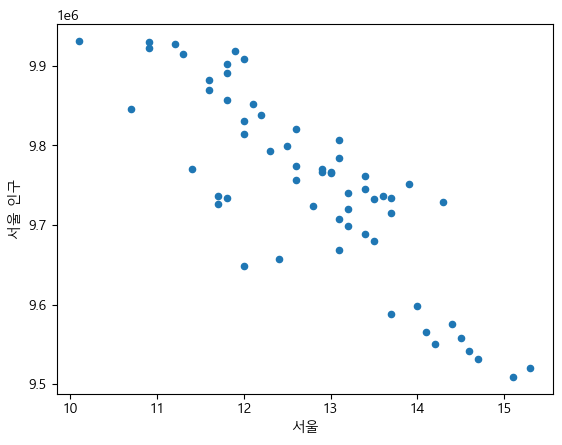

In [428]:
seoul_df.plot.scatter(x = '서울' , y = '서울 인구')

<Axes: xlabel='서울', ylabel='gdp'>

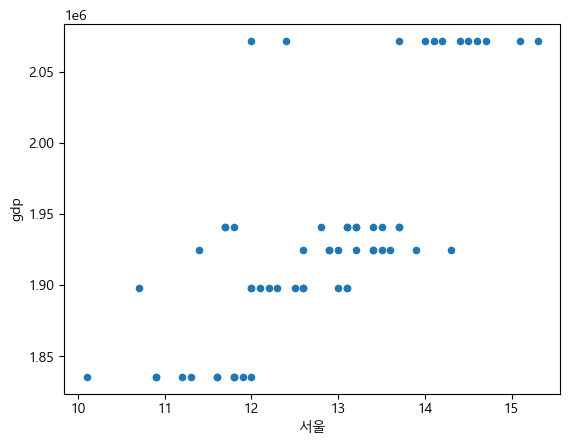

In [429]:
seoul_df.plot.scatter(x = '서울' , y = 'gdp')

<Axes: xlabel='서울', ylabel='consumer_price_index'>

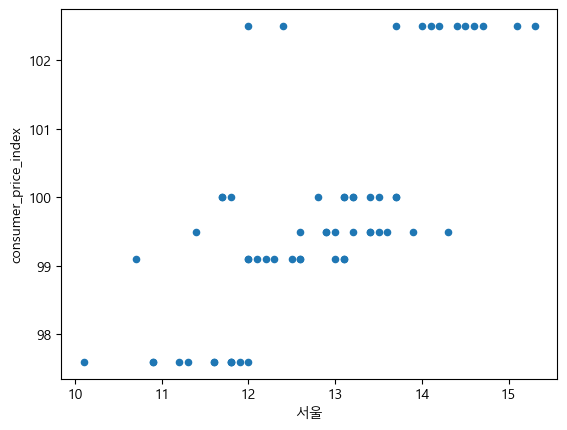

In [430]:
seoul_df.plot.scatter(x = '서울' , y = 'consumer_price_index')

In [431]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [432]:
seoul_df1 = seoul_df[['서울' , '서울 인구' , 'gdp' , 'consumer_price_index']]
X = seoul_df1.loc[ : , seoul_df1.columns != '서울']
y = seoul_df1['서울']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 0)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


MSE train : 0.058 , test : 0.510
R^2 train : 0.953 , test : 0.631


In [433]:
busan_df1 = busan_df[['부산' , '부산 인구' , 'gdp' , 'consumer_price_index']]
X = busan_df1.loc[ : , busan_df1.columns != '부산']
y = busan_df['부산']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')


forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.004 , test : 0.040
R^2 train : 0.963 , test : 0.628


In [434]:
daegu_df1 = daegu_df[['대구' , '대구 인구' , 'gdp' , 'consumer_price_index']]
X = daegu_df1.loc[ : , daegu_df1.columns != '대구']
y = daegu_df1['대구']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.002 , test : 0.024
R^2 train : 0.974 , test : 0.607


In [435]:
incheon_df1 = incheon_df[['인천' , '인천 인구' , 'gdp' , 'consumer_price_index']]
X = incheon_df1.loc[ : , incheon_df1.columns != '인천']
y = incheon_df1['인천']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.005 , test : 0.024
R^2 train : 0.934 , test : 0.670


In [436]:
gwangju_df1 = gwangju_df[['광주' , '광주 인구' , 'gdp' , 'consumer_price_index']]
X = gwangju_df1.loc[ : , gwangju_df1.columns != '광주']
y = gwangju_df1['광주']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.001 , test : 0.005
R^2 train : 0.964 , test : 0.835


In [437]:
daejun_df1 = daejun_df[['대전' , '대전 인구' , 'gdp' , 'consumer_price_index']]
X = daejun_df1.loc[ : , daejun_df1.columns != '대전']
y = daejun_df1['대전']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.001 , test : 0.006
R^2 train : 0.958 , test : 0.759


In [438]:
ulsan_df1 = ulsan_df[['울산' , '울산 인구' , 'gdp' , 'consumer_price_index']]
X = ulsan_df1.loc[ : , ulsan_df1.columns != '울산']
y = ulsan_df1['울산']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.001 , test : 0.006
R^2 train : 0.948 , test : 0.365


In [439]:
sejong_df1 = sejong_df[['세종' , '세종 인구' , 'gdp' , 'consumer_price_index']]
X = sejong_df1.loc[ : , sejong_df1.columns != '세종']
y = sejong_df1['세종']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.000 , test : 0.002
R^2 train : 0.988 , test : 0.837


In [440]:
gyunggi_df1 = gyunggi_df[['경기' , '경기 인구' , 'gdp' , 'consumer_price_index']]
X = gyunggi_df1.loc[ : , gyunggi_df1.columns != '경기']
y = gyunggi_df['경기']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.071 , test : 0.742
R^2 train : 0.978 , test : 0.769


In [441]:
gangwon_df1 = gangwon_df[['강원' , '강원 인구' , 'gdp' , 'consumer_price_index']]
X = gangwon_df1.loc[ : , gangwon_df1.columns != '강원']
y = gangwon_df['강원']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.002 , test : 0.009
R^2 train : 0.937 , test : 0.741


In [442]:
chungbuk_df1 = chungbuk_df[['충북' , '충북 인구' , 'gdp' , 'consumer_price_index']]
X = chungbuk_df1.loc[ : , chungbuk_df1.columns != '충북']
y = chungbuk_df1['충북']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.001 , test : 0.010
R^2 train : 0.967 , test : 0.756


In [443]:
chungnam_df1 = chungnam_df[['충남' , '충남 인구' , 'gdp' , 'consumer_price_index']]
X = chungnam_df1.loc[ : , chungnam_df1.columns != '충남']
y = chungnam_df['충남']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.003 , test : 0.011
R^2 train : 0.942 , test : 0.790


In [444]:
junbuk_df1 = junbuk_df[['전북' , '전북 인구' , 'gdp' , 'consumer_price_index']]
X = junbuk_df1.loc[ : , junbuk_df1.columns != '전북']
y = junbuk_df1['전북']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.001 , test : 0.007
R^2 train : 0.975 , test : 0.804


In [445]:
junnam_df1 = junnam_df[['전남' , '전남 인구' , 'gdp' , 'consumer_price_index']]
X = junnam_df1.loc[ : , junnam_df1.columns != '전남']
y = junnam_df1['전남']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.001 , test : 0.010
R^2 train : 0.977 , test : 0.739


In [446]:
gyungbuk_df1 = gyungbuk_df[['경북' , '경북 인구' , 'gdp' , 'consumer_price_index']]
X = gyungbuk_df1.loc[ : , gyungbuk_df1.columns != '경북']
y = gyungbuk_df1['경북']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.002 , test : 0.017
R^2 train : 0.961 , test : 0.729


In [447]:
gyungnam_df1 = gyungnam_df[['경남' , '경남 인구' , 'gdp' , 'consumer_price_index']]
X = gyungnam_df1.loc[ : , gyungnam_df1.columns != '경남']
y = gyungnam_df1['경남']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.003 , test : 0.033
R^2 train : 0.970 , test : 0.641


In [448]:
jaeju_df1 = jaeju_df[['제주' , '제주 인구' , 'gdp' , 'consumer_price_index']]
X = jaeju_df1.loc[ : , jaeju_df1.columns != '제주']
y = jaeju_df1['제주']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 20)

forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error')

forest.fit(X_train , y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train : %.3f , test : %.3f' % (
        mean_squared_error(y_train , y_train_pred) ,
        mean_squared_error(y_test , y_test_pred)))
print('R^2 train : %.3f , test : %.3f' % (
        r2_score(y_train , y_train_pred) ,
        r2_score(y_test , y_test_pred)))

MSE train : 0.000 , test : 0.003
R^2 train : 0.933 , test : 0.520


In [449]:
pd.options.mode.chained_assignment = None

In [450]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [451]:
scale_columns = ['서울 인구' , '부산 인구' , '대구 인구' , '인천 인구' , '광주 인구' , '대전 인구' , '울산 인구' , 
                 '세종 인구' , '경기 인구' , '강원 인구' , '충북 인구' , '충남 인구' , '전북 인구' , '전남 인구' , 
                 '경북 인구' , '경남 인구' , '제주 인구' , 'gdp' , 'consumer_price_index']
whole_data1= standard_scaling(whole_data , scale_columns)
whole_data1

,서울 인구,부산 인구,대구 인구,인천 인구,광주 인구,대전 인구,울산 인구,세종 인구,경기 인구,강원 인구,충북 인구,충남 인구,전북 인구,전남 인구,경북 인구,경남 인구,제주 인구,gdp,consumer_price_index
'17.01,1.568085,1.639420,1.314506,-0.766283,1.557886,1.698697,1.531155,-2.060056,-1.662394,1.714233,-2.039892,-3.239891,1.576502,1.510371,1.507378,0.769667,-2.483304,-1.259789,-1.329844
'17.02,1.576196,1.608754,1.310834,-0.725961,1.425631,1.673225,1.414960,-1.987896,-1.613707,1.474906,-1.910597,-2.858657,1.519294,1.436055,1.399007,0.680126,-2.341987,-1.259789,-1.329844
'17.03,1.537604,1.551312,1.274450,-0.668850,1.330322,1.583085,1.338773,-1.890868,-1.564746,1.346018,-2.030798,-2.494834,1.456676,1.372396,1.320817,0.651756,-2.217443,-1.259789,-1.329844
'17.04,1.500931,1.509851,1.261666,-0.562945,1.234637,1.540739,1.315383,-1.811304,-1.526331,1.307127,-1.716456,-2.171436,1.423365,1.380049,1.288665,0.652105,-2.089964,-1.259789,-1.329844
'17.05,1.468548,1.461059,1.240670,-0.411540,1.201949,1.444137,1.278384,-1.674495,-1.483157,1.275716,-1.684428,-1.944936,1.390310,1.355824,1.247007,0.696054,-1.942461,-1.259789,-1.329844
'17.06,1.428298,1.398785,1.224281,-0.310342,1.165629,1.366707,1.248635,-1.568763,-1.450178,1.369452,-1.660309,-1.702236,1.342942,1.307799,1.197421,0.733283,-1.842868,-1.259789,-1.329844
'17.07,1.378200,1.357913,1.207724,-0.171017,1.161120,1.337870,1.208763,-1.486894,-1.405375,1.259262,-1.587951,-1.449695,1.304860,1.289771,1.164437,0.796345,-1.665383,-1.259789,-1.329844
'17.08,1.321406,1.342521,1.154250,-0.137912,1.189550,1.312185,1.138116,-1.404809,-1.349027,1.276214,-1.506894,-1.118272,1.264989,1.209634,1.151164,0.789676,-1.487373,-1.259789,-1.329844
'17.09,1.229147,1.310017,1.099140,-0.250250,1.189174,1.292160,1.102279,-1.342221,-1.281194,1.354245,-1.391833,-0.873907,1.242200,1.174847,1.187565,0.832580,-1.342492,-1.259789,-1.329844
'17.10,1.154134,1.199351,1.064092,-0.124733,1.198818,1.243459,1.112059,-1.269491,-1.228495,1.411833,-1.287447,-0.684501,1.209741,1.148698,1.200356,0.947355,-1.187336,-1.259789,-1.329844


In [452]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [453]:
df_seoul = pd.concat([whole_data1['서울 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['서울']] ,  axis = 1)
df_busan = pd.concat([whole_data1['부산 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['부산']] , axis = 1)
df_daegu = pd.concat([whole_data1['대구 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['대구']] , axis = 1)
df_incheon = pd.concat([whole_data1['인천 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['인천']] , axis = 1)
df_gwangju = pd.concat([whole_data1['광주 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['광주']] , axis = 1)
df_daejun = pd.concat([whole_data1['대전 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['대전']] , axis = 1)
df_ulsan = pd.concat([whole_data1['울산 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['울산']] , axis = 1)
df_sejong = pd.concat([whole_data1['세종 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['세종']] , axis = 1)
df_gyunggi = pd.concat([whole_data1['경기 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['경기']] , axis = 1)
df_gangwon = pd.concat([whole_data1['강원 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['강원']] , axis = 1)
df_chungbuk = pd.concat([whole_data1['충북 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['충북']] , axis = 1)
df_chungnam = pd.concat([whole_data1['충남 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['충남']] , axis = 1)
df_junbuk = pd.concat([whole_data1['전북 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['전북']] , axis = 1)
df_junnam = pd.concat([whole_data1['전남 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['전남']] , axis = 1)
df_gyungbuk = pd.concat([whole_data1['경북 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['경북']] , axis = 1)
df_gyungnam = pd.concat([whole_data1['경남 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['경남']] , axis = 1)
df_jaeju = pd.concat([whole_data1['제주 인구'] , whole_data1['gdp'] , whole_data1['consumer_price_index'] , df_card_spend['제주']] , axis = 1)
df_jaeju.head(10)

,제주 인구,gdp,consumer_price_index,제주
'17.01,-2.483304,-1.259789,-1.329844,0.6
'17.02,-2.341987,-1.259789,-1.329844,0.6
'17.03,-2.217443,-1.259789,-1.329844,0.6
'17.04,-2.089964,-1.259789,-1.329844,0.6
'17.05,-1.942461,-1.259789,-1.329844,0.7
'17.06,-1.842868,-1.259789,-1.329844,0.6
'17.07,-1.665383,-1.259789,-1.329844,0.7
'17.08,-1.487373,-1.259789,-1.329844,0.7
'17.09,-1.342492,-1.259789,-1.329844,0.7
'17.10,-1.187336,-1.259789,-1.329844,0.7


In [454]:
# 서울
X = df_seoul[df_seoul.columns.difference(['서울'])]
y = df_seoul['서울']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [455]:
lr1 = linear_model.LinearRegression()
model1 = lr1.fit(X_train , y_train)
print(lr1.coef_)

[-2.17371821  0.96652415 -2.1816572 ]


In [456]:
# R2 score
print(model1.score(X_train , y_train))
print(model1.score(X_test , y_test))

0.785576181218735
0.7400791880721214


In [457]:
# RMSE score
y_predictions = lr1.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr1.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.533743520320314
0.5569796397264027


In [458]:
# 부산
X = df_busan[df_busan.columns.difference(['부산'])]
y = df_busan['부산']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [459]:
lr2 = linear_model.LinearRegression()
model2 = lr2.fit(X_train , y_train)
print(lr2.coef_)

[-0.38310439  0.22372304 -0.46712129]


In [460]:
# R2 score
print(model2.score(X_train , y_train))
print(model2.score(X_test , y_test))

0.8134592576375259
0.803544810645941


In [461]:
# RMSE score
y_predictions = lr2.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr2.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.14705868787327941
0.1406967976597834


In [462]:
# 대구
X = df_daegu[df_daegu.columns.difference(['대구'])]
y = df_daegu['대구']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [463]:
lr3 = linear_model.LinearRegression()
model3 = lr3.fit(X_train , y_train)
print(lr3.coef_)

[ 0.08200588 -0.12106973 -0.2610897 ]


In [464]:
# R2 score
print(model3.score(X_train , y_train))
print(model3.score(X_test , y_test))

0.6990005039077376
0.6152990743595327


In [465]:
# RMSE score
y_predictions = lr3.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr3.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.14341652240811703
0.14728495426007712


In [466]:
# 인천
X = df_incheon[df_incheon.columns.difference(['인천'])]
y = df_incheon['인천']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [467]:
lr4 = linear_model.LinearRegression()
model4 = lr4.fit(X_train , y_train)
print(lr4.coef_)

[ 0.47108444 -0.24320301  0.06301921]


In [468]:
# R2 score
print(model4.score(X_train , y_train))
print(model4.score(X_test , y_test))

0.5745791452020432
0.8032888048343784


In [469]:
# RMSE score
y_predictions = lr4.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr4.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.17574265333306074
0.1216319083810431


In [470]:
# 광주
X = df_gwangju[df_gwangju.columns.difference(['광주'])]
y = df_gwangju['광주']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [471]:
lr5 = linear_model.LinearRegression()
model5 = lr5.fit(X_train , y_train)
print(lr5.coef_)

[ 0.11392198 -0.19631399 -0.23719225]


In [472]:
# R2 score
print(model5.score(X_train , y_train))
print(model5.score(X_test , y_test))

0.7568167810244848
0.8780340868873562


In [473]:
# RMSE score
y_predictions = lr5.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr5.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.08830575487803416
0.058496337075203624


In [474]:
# 대전
X = df_daejun[df_daejun.columns.difference(['대전'])]
y = df_daejun['대전']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [475]:
lr6 = linear_model.LinearRegression()
model6 = lr6.fit(X_train , y_train)
print(lr6.coef_)

[-0.32886123  0.29238248 -0.19674219]


In [476]:
# R2 score
print(model6.score(X_train , y_train))
print(model6.score(X_test , y_test))

0.7768270227841854
0.730902433317603


In [477]:
# RMSE score
y_predictions = lr6.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr6.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.08369678479386015
0.07769174936461606


In [478]:
# 울산
X = df_ulsan[df_ulsan.columns.difference(['울산'])]
y = df_ulsan['울산']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [479]:
lr7 = linear_model.LinearRegression()
model7 = lr7.fit(X_train , y_train)
print(lr7.coef_)

[-0.03456649 -0.00057282 -0.12250335]


In [480]:
# R2 score
print(model7.score(X_train , y_train))
print(model7.score(X_test , y_test))

0.6039271889784599
0.4890634431968489


In [481]:
# RMSE score
y_predictions = lr7.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr7.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.07035048735971337
0.061616089381671076


In [482]:
# 세종
X = df_sejong[df_sejong.columns.difference(['세종'])]
y = df_sejong['세종']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [483]:
lr8 = linear_model.LinearRegression()
model8 = lr8.fit(X_train , y_train)
print(lr8.coef_)

[-0.19128496  0.20564114  0.08860193]


In [484]:
# R2 score
print(model8.score(X_train , y_train))
print(model8.score(X_test , y_test))

0.8860943373188447
0.9201664515488701


In [485]:
# RMSE score
y_predictions = lr8.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr8.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.03455333634893798
0.029408560684839834


In [486]:
# 경기
X = df_gyunggi[df_gyunggi.columns.difference(['경기'])]
y = df_gyunggi['경기']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [487]:
lr9 = linear_model.LinearRegression()
model9 = lr9.fit(X_train , y_train)
print(lr9.coef_)

[-2.58585567  2.63222763  1.63165943]


In [488]:
# R2 score
print(model9.score(X_train , y_train))
print(model9.score(X_test , y_test))

0.8171305198321341
0.8651575887068301


In [489]:
# RMSE score
y_predictions = lr9.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr9.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.7613257395478196
0.6556847982628976


In [490]:
# 강원
X = df_gangwon[df_gangwon.columns.difference(['강원'])]
y = df_gangwon['강원']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [491]:
lr10 = linear_model.LinearRegression()
model10 = lr10.fit(X_train , y_train)
print(lr10.coef_)

[-0.04367534  0.09747683 -0.09259901]


In [492]:
# R2 score
print(model10.score(X_train , y_train))
print(model10.score(X_test , y_test))

0.7221430663628
0.7740744458121029


In [493]:
# RMSE score
y_predictions = lr10.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr10.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.08590325269431687
0.08997591728753299


In [494]:
# 충북
X = df_chungbuk[df_chungbuk.columns.difference(['충북'])]
y = df_chungbuk['충북']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [495]:
lr11 = linear_model.LinearRegression()
model11 = lr11.fit(X_train , y_train)
print(lr11.coef_)

[ 0.19142858 -0.06363222  0.05573605]


In [496]:
# R2 score
print(model11.score(X_train , y_train))
print(model11.score(X_test , y_test))

0.7379636556336213
0.8862285378135866


In [497]:
# RMSE score
y_predictions = lr11.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr11.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.0951412342150804
0.06669443859610304


In [498]:
# 충남
X = df_chungnam[df_chungnam.columns.difference(['충남'])]
y = df_chungnam['충남']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [499]:
lr12 = linear_model.LinearRegression()
model12 = lr12.fit(X_train , y_train)
print(lr12.coef_)

[0.03496325 0.12435342 0.06431423]


In [500]:
# R2 score
print(model12.score(X_train , y_train))
print(model12.score(X_test , y_test))

0.699433313895276
0.8553972591928696


In [501]:
# RMSE score
y_predictions = lr12.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr12.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.12050797341570904
0.08567728676470777


In [502]:
# 전북
X = df_junbuk[df_junbuk.columns.difference(['전북'])]
y = df_junbuk['전북']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [503]:
lr13 = linear_model.LinearRegression()
model13 = lr13.fit(X_train , y_train)
print(lr13.coef_)

[-0.08705906  0.06536816 -0.18388383]


In [504]:
# R2 score
print(model13.score(X_train , y_train))
print(model13.score(X_test , y_test))

0.7990200272925179
0.8366617682009474


In [505]:
# RMSE score
y_predictions = lr13.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr13.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.07959635424060588
0.07650459663401094


In [506]:
# 전남
X = df_junnam[df_junnam.columns.difference(['전남'])]
y = df_junnam['전남']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [507]:
lr14 = linear_model.LinearRegression()
model14 = lr14.fit(X_train , y_train)
print(lr14.coef_)

[ 0.13648868 -0.13434483 -0.1739368 ]


In [508]:
# R2 score
print(model14.score(X_train , y_train))
print(model14.score(X_test , y_test))

0.8248503433596177
0.7906105319255511


In [509]:
# RMSE score
y_predictions = lr14.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr14.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.07904953444368687
0.08983439810026032


In [510]:
# 경북
X = df_gyungbuk[df_gyungbuk.columns.difference(['경북'])]
y = df_gyungbuk['경북']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [511]:
lr15 = linear_model.LinearRegression()
model15 = lr15.fit(X_train , y_train)
print(lr15.coef_)

[-0.22799683  0.24687198 -0.18262061]


In [512]:
# R2 score
print(model15.score(X_train , y_train))
print(model15.score(X_test , y_test))

0.6906071807349685
0.7678901553536848


In [513]:
# RMSE score
y_predictions = lr15.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr15.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.1304013780700733
0.12017649659375373


In [514]:
# 경남
X = df_gyungnam[df_gyungnam.columns.difference(['경남'])]
y = df_gyungnam['경남']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [515]:
lr16 = linear_model.LinearRegression()
model16 = lr16.fit(X_train , y_train)
print(lr16.coef_)

[ 0.52932873 -0.40493491 -0.12986772]


In [516]:
# R2 score
print(model16.score(X_train , y_train))
print(model16.score(X_test , y_test))

0.6783502101383003
0.7541390341355018


In [517]:
# RMSE score
y_predictions = lr16.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr16.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.1693530029140362
0.14661432684072373


In [518]:
# 제주
X = df_jaeju[df_jaeju.columns.difference(['제주'])]
y = df_jaeju['제주']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 20)

In [519]:
lr17 = linear_model.LinearRegression()
model17 = lr17.fit(X_train , y_train)
print(lr17.coef_)

[-0.31320739  0.29493893  0.08128599]


In [520]:
# R2 score
print(model17.score(X_train , y_train))
print(model17.score(X_test , y_test))

0.6269939106150203
0.7265915700432372


In [521]:
# RMSE score
y_predictions = lr17.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) 
y_predictions = lr17.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.044949412130030224
0.04507301330231814


In [522]:
# 한국 경제 연구원은 2023년 gdp는 2022년 대비 + 1.7% 일 것으로 전망
# 2022년 gdp는 2021년 대비 + 2.6%
# 마찬가지로 2023년 소비자 물가 지수는 2022년 대비 + 3.5% 일 것으로 전망
# 2022년 소비자 물가 지수는 2021년 대비 + 5.2%

In [523]:
consumer_price_index_2023 = round(102.5 * (102.6 / 100) * (105.2 / 100) , 1)
gdp_2023 = round(2071658 * (102.6 / 100) * (101.7 / 1000) , 1)
gdp_2023

216165.5

In [524]:
index_ = population_2023.index
index_

Index(['23.01', '23.02', '23.03', '23.04', '23.05', '23.06', '23.07', '23.08',
       '23.09', '23.10', '23.11', '23.12'],
      dtype='object')

In [525]:
np.random.seed(42)
a = np.random.uniform(gdp_2023 - 3 , gdp_2023 + 3 , 12)
a = np.round(a , 2)
a

array([216164.75, 216168.2 , 216166.89, 216166.09, 216163.44, 216163.44,
       216162.85, 216167.7 , 216166.11, 216166.75, 216162.62, 216168.32])

In [526]:
df_gdp_2023 = pd.DataFrame(a , index = index_ , columns = ['gdp'])
df_gdp_2023

,gdp
23.01,216164.75
23.02,216168.20
23.03,216166.89
23.04,216166.09
23.05,216163.44
23.06,216163.44
23.07,216162.85
23.08,216167.70
23.09,216166.11
23.10,216166.75


In [527]:
np.random.seed(43)
b = np.random.uniform(consumer_price_index_2023 - 0.2 , consumer_price_index_2023 + 0.2 , 12)
b = np.round(b , 2)
b

array([110.45, 110.64, 110.45, 110.5 , 110.53, 110.74, 110.67, 110.62,
       110.41, 110.69, 110.56, 110.72])

In [528]:
consumer_price_index_2023 = pd.DataFrame(b , index = index_ , columns = ['consumer_price_index'])
consumer_price_index_2023

,consumer_price_index
23.01,110.45
23.02,110.64
23.03,110.45
23.04,110.50
23.05,110.53
23.06,110.74
23.07,110.67
23.08,110.62
23.09,110.41
23.10,110.69


In [529]:
data_2023 = pd.concat([population_2023 , df_gdp_2023 , consumer_price_index_2023] , axis = 1)
data_2023

,서울 인구,부산 인구,대구 인구,인천 인구,광주 인구,대전 인구,울산 인구,세종 인구,경기 인구,강원 인구,충북 인구,충남 인구,전북 인구,전남 인구,경북 인구,경남 인구,제주 인구,gdp,consumer_price_index
23.01,9460273,3332183,2374858,2963359,1431943,1447345,1113279,385526,13602864,1542098,1598218,2122463,1779484,1842999,2612639,3289073,680064,216164.75,110.45
23.02,9468340,3326430,2373973,2968696,1438086,1447345,1115727,379033,13605552,1536685,1599868,2125664,1772673,1851474,2605964,3295986,679080,216168.20,110.64
23.03,9467386,3333379,2370100,2962106,1432113,1447125,1116852,385853,13599515,1541550,1596410,2126058,1778620,1834730,2610983,3288397,679902,216166.89,110.45
23.04,9477189,3328324,2373009,2962148,1433691,1452390,1115149,382790,13603695,1537730,1595272,2122450,1778009,1842995,2611363,3291601,678810,216166.09,110.50
23.05,9470664,3327860,2372788,2962010,1431550,1451190,1114518,384619,13605456,1542438,1596891,2124683,1773729,1856639,2611180,3294298,678953,216163.44,110.53
23.06,9466766,3327947,2375814,2964570,1434122,1448791,1115606,381049,13607840,1541920,1596090,2125082,1778480,1832849,2606897,3295740,679634,216163.44,110.74
23.07,9471657,3333493,2369983,2968405,1438053,1448729,1114236,381262,13602362,1537597,1602178,2123487,1777804,1846324,2608181,3294303,680483,216162.85,110.67
23.08,9472476,3328622,2369808,2961774,1434930,1445925,1114174,380192,13607803,1543388,1595429,2126199,1774529,1852764,2608225,3290647,680436,216167.70,110.62
23.09,9472971,3327426,2375536,2968807,1434329,1449538,1112270,381559,13600128,1543490,1598920,2125851,1779058,1833081,2613446,3293751,680518,216166.11,110.41
23.10,9473373,3326262,2370433,2964688,1432606,1451648,1116600,381284,13605542,1539803,1596479,2124258,1776047,1834057,2612119,3291394,679914,216166.75,110.69


In [530]:
data_2023.to_csv('data_2023.csv')

In [531]:
scale_columns = ['서울 인구' , '부산 인구' , '대구 인구' , '인천 인구' , '광주 인구' , '대전 인구' , '울산 인구' , 
                 '세종 인구' , '경기 인구' , '강원 인구' , '충북 인구' , '충남 인구' , '전북 인구' , '전남 인구' , 
                 '경북 인구' , '경남 인구' , '제주 인구' , 'gdp' , 'consumer_price_index']
data_2023_1= standard_scaling(data_2023 , scale_columns)

In [532]:
# 서울 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '서울 인구']]
predict_2023_seoul_card_spend = lr1.predict(X)
predict_2023_seoul_card_spend

array([19.17561706, 13.66239776, 17.09820392, 11.55559058, 12.57244987,
       10.24073567,  9.20044259, 12.03382723, 15.09894396,  9.87408674,
       14.36835597,  8.29307226])

In [533]:
# 부산 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '부산 인구']]
predict_2023_busan_card_spend = lr2.predict(X)
predict_2023_busan_card_spend

array([3.44999096, 4.19903591, 3.46561274, 4.10931996, 3.80851967,
       3.08639743, 2.27483128, 3.82406058, 4.57368935, 3.90618572,
       3.4857151 , 2.9645162 ])

In [534]:
 #대구 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '대구 인구']]
predict_2023_daegu_card_spend = lr3.predict(X)
predict_2023_daegu_card_spend

array([2.25844316, 2.28344282, 2.60259568, 2.39890385, 2.59494004,
       2.44890393, 3.00537903, 2.70706286, 2.08464272, 2.7508257 ,
       2.45325393, 2.91746665])

In [535]:
# 인천 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '인천 인구']]
predict_2023_incheon_card_spend = lr4.predict(X)
predict_2023_incheon_card_spend

array([2.70383461, 3.21562629, 2.42676886, 2.72725913, 3.15493418,
       4.08384306, 3.95227452, 3.02868199, 2.50843577, 3.49653815,
       3.42283697, 3.4716633 ])

In [536]:
# 광주 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '광주 인구']]
predict_2023_gwangju_card_spend = lr5.predict(X)
predict_2023_gwangju_card_spend

array([1.87467264, 1.14339305, 1.65812774, 1.6290381 , 2.11546013,
       2.07479563, 1.67655002, 1.47785641, 1.4748939 , 1.86329812,
       1.6349691 , 1.78610675])

In [537]:
# 대전 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '대전 인구']]
predict_2023_daejun_card_spend = lr6.predict(X)
predict_2023_daejun_card_spend

array([2.11660443, 2.04789097, 2.43532598, 1.67943439, 1.33796116,
       0.95921811, 1.08520506, 2.1709652 , 2.21311031, 1.29291909,
       1.2831806 , 1.88431621])

In [538]:
# 울산 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '울산 인구']]
predict_2023_ulsan_card_spend = lr7.predict(X)
predict_2023_ulsan_card_spend

array([1.40696616, 1.13078699, 1.08885699, 1.22523604, 1.27292548,
       1.112475  , 1.25563915, 1.27500803, 1.5084084 , 1.03841906,
       1.30056499, 1.31717023])

In [539]:
# 세종 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '세종 인구']]
predict_2023_sejong_card_spend = lr8.predict(X)
predict_2023_sejong_card_spend

array([ 0.6380762 ,  0.38739211,  0.86109852,  0.57181993,  0.33783698,
       -0.16298735, -0.09429313,  0.42009605,  0.67397314,  0.25475528,
        0.13106444,  0.3402002 ])

In [540]:
# 경기 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '경기 인구']]
predict_2023_gyunggi_card_spend = lr9.predict(X)
predict_2023_gyunggi_card_spend

array([16.93864575, 18.54692672, 17.62465923, 17.97691866, 15.02444036,
       11.67481435,  9.26199999, 19.71580874, 17.92115106, 15.58856388,
       10.89983518, 15.30795261])

In [541]:
# 강원 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '강원 인구']]
predict_2023_gangwon_card_spend = lr10.predict(X)
predict_2023_gangwon_card_spend

array([1.40886013, 1.68499216, 1.52728009, 1.6043249 , 1.30551967,
       1.24303717, 1.3934205 , 1.43548425, 1.43871588, 1.48969348,
       1.46739638, 1.46993948])

In [542]:
# 충북 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '충북 인구']]
predict_2023_chungbuk_card_spend = lr11.predict(X)
predict_2023_chungbuk_card_spend

array([1.36406228, 1.6215278 , 1.25270211, 1.33171123, 1.50409752,
       1.83658997, 1.89348039, 1.48876788, 1.2736827 , 1.66227616,
       1.59302231, 1.61826446])

In [543]:
# 충남 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '충남 인구']]
predict_2023_chungnam_card_spend = lr12.predict(X)
predict_2023_chungnam_card_spend

array([1.87166769, 2.27488738, 2.15630968, 1.96576739, 1.91625022,
       1.99827727, 1.87176817, 2.26265924, 2.08876039, 2.14263328,
       1.95910043, 2.33336443])

In [544]:
# 전북 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '전북 인구']]
predict_2023_junbuk_card_spend = lr13.predict(X)
predict_2023_junbuk_card_spend

array([1.52510469, 2.02742156, 1.66022443, 1.6455634 , 1.87967124,
       1.34221695, 1.4310121 , 1.8799353 , 1.6318005 , 1.67643413,
       1.78179772, 1.60509211])

In [545]:
# 전남 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '전남 인구']]
predict_2023_junnam_card_spend = lr14.predict(X)
predict_2023_junnam_card_spend

array([1.41278363, 1.27537306, 1.41701163, 1.38710901, 1.35976068,
       2.01739881, 1.7413141 , 1.26136013, 1.44706632, 1.72518247,
       1.98809341, 1.32718763])

In [546]:
# 경북 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '경북 인구']]
predict_2023_gyungbuk_card_spend = lr15.predict(X)
predict_2023_gyungbuk_card_spend

array([2.21800194, 2.71161612, 2.58575447, 2.36492928, 2.00630349,
       1.88649337, 1.86718901, 2.53414635, 2.40125191, 2.00888392,
       1.85625632, 2.5400809 ])

In [547]:
# 경남 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '경남 인구']]
predict_2023_gyungnam_card_spend = lr16.predict(X)
predict_2023_gyungnam_card_spend

array([2.93017482, 2.7794907 , 2.55380075, 2.769388  , 3.2756317 ,
       4.17504208, 4.04002315, 3.0679609 , 2.23226692, 3.53664902,
       3.64215812, 3.32968955])

In [548]:
# 제주 2023년 카드 예측
X = data_2023_1[['consumer_price_index' , 'gdp' , '제주 인구']]
predict_2023_jaeju_card_spend = lr17.predict(X)
predict_2023_jaeju_card_spend

array([ 1.01951314,  0.85695883,  1.29949929,  0.91183865,  0.47532228,
       -0.01649521,  0.20038885,  1.01289349,  1.3777737 ,  0.62107561,
        0.48763846,  0.69143946])

In [549]:
whole_2023_data = pd.DataFrame([predict_2023_seoul_card_spend , predict_2023_busan_card_spend , predict_2023_daegu_card_spend , predict_2023_incheon_card_spend , 
                                predict_2023_gwangju_card_spend , predict_2023_daejun_card_spend , predict_2023_ulsan_card_spend , predict_2023_sejong_card_spend ,
                                predict_2023_gyunggi_card_spend , predict_2023_gangwon_card_spend , predict_2023_chungbuk_card_spend , predict_2023_chungnam_card_spend , 
                                predict_2023_junbuk_card_spend , predict_2023_junnam_card_spend , predict_2023_gyungbuk_card_spend , predict_2023_gyungnam_card_spend ,
                                predict_2023_jaeju_card_spend])
whole_2023_data.columns = index_
whole_2023_data.index = index
whole_2023_data

,23.01,23.02,23.03,23.04,23.05,23.06,23.07,23.08,23.09,23.10,23.11,23.12
행정구역,,,,,,,,,,,,
서울,19.175617,13.662398,17.098204,11.555591,12.572450,10.240736,9.200443,12.033827,15.098944,9.874087,14.368356,8.293072
부산,3.449991,4.199036,3.465613,4.109320,3.808520,3.086397,2.274831,3.824061,4.573689,3.906186,3.485715,2.964516
대구,2.258443,2.283443,2.602596,2.398904,2.594940,2.448904,3.005379,2.707063,2.084643,2.750826,2.453254,2.917467
인천,2.703835,3.215626,2.426769,2.727259,3.154934,4.083843,3.952275,3.028682,2.508436,3.496538,3.422837,3.471663
광주,1.874673,1.143393,1.658128,1.629038,2.115460,2.074796,1.676550,1.477856,1.474894,1.863298,1.634969,1.786107
대전,2.116604,2.047891,2.435326,1.679434,1.337961,0.959218,1.085205,2.170965,2.213110,1.292919,1.283181,1.884316
울산,1.406966,1.130787,1.088857,1.225236,1.272925,1.112475,1.255639,1.275008,1.508408,1.038419,1.300565,1.317170
세종,0.638076,0.387392,0.861099,0.571820,0.337837,-0.162987,-0.094293,0.420096,0.673973,0.254755,0.131064,0.340200
경기,16.938646,18.546927,17.624659,17.976919,15.024440,11.674814,9.262000,19.715809,17.921151,15.588564,10.899835,15.307953


In [550]:
whole_2023_data_t = whole_2023_data.transpose()
whole_2023_data_t

행정구역,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
23.01,19.175617,3.449991,2.258443,2.703835,1.874673,2.116604,1.406966,0.638076,16.938646,1.408860,1.364062,1.871668,1.525105,1.412784,2.218002,2.930175,1.019513
23.02,13.662398,4.199036,2.283443,3.215626,1.143393,2.047891,1.130787,0.387392,18.546927,1.684992,1.621528,2.274887,2.027422,1.275373,2.711616,2.779491,0.856959
23.03,17.098204,3.465613,2.602596,2.426769,1.658128,2.435326,1.088857,0.861099,17.624659,1.527280,1.252702,2.156310,1.660224,1.417012,2.585754,2.553801,1.299499
23.04,11.555591,4.109320,2.398904,2.727259,1.629038,1.679434,1.225236,0.571820,17.976919,1.604325,1.331711,1.965767,1.645563,1.387109,2.364929,2.769388,0.911839
23.05,12.572450,3.808520,2.594940,3.154934,2.115460,1.337961,1.272925,0.337837,15.024440,1.305520,1.504098,1.916250,1.879671,1.359761,2.006303,3.275632,0.475322
23.06,10.240736,3.086397,2.448904,4.083843,2.074796,0.959218,1.112475,-0.162987,11.674814,1.243037,1.836590,1.998277,1.342217,2.017399,1.886493,4.175042,-0.016495
23.07,9.200443,2.274831,3.005379,3.952275,1.676550,1.085205,1.255639,-0.094293,9.262000,1.393420,1.893480,1.871768,1.431012,1.741314,1.867189,4.040023,0.200389
23.08,12.033827,3.824061,2.707063,3.028682,1.477856,2.170965,1.275008,0.420096,19.715809,1.435484,1.488768,2.262659,1.879935,1.261360,2.534146,3.067961,1.012893
23.09,15.098944,4.573689,2.084643,2.508436,1.474894,2.213110,1.508408,0.673973,17.921151,1.438716,1.273683,2.088760,1.631801,1.447066,2.401252,2.232267,1.377774
23.10,9.874087,3.906186,2.750826,3.496538,1.863298,1.292919,1.038419,0.254755,15.588564,1.489693,1.662276,2.142633,1.676434,1.725182,2.008884,3.536649,0.621076


<Axes: >

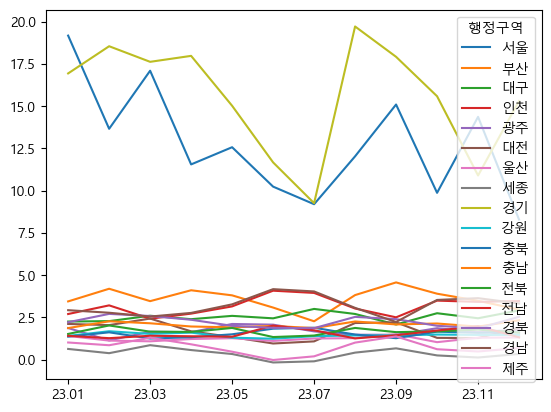

In [551]:
whole_2023_data_t.plot()

In [552]:
# 2021년 데이터와 비교

In [553]:
df_card_spend

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
사용금액(조원)연월,,,,,,,,,,,,,,,,,
'21.12,15.1,4.2,3.1,3.7,2.0,2.1,1.5,0.6,19.3,1.8,1.9,2.5,2.1,1.9,2.7,3.8,0.9
'21.11,15.3,4.3,3.1,3.8,2.1,2.1,1.5,0.6,19.5,1.8,1.9,2.5,2.1,1.9,2.8,3.9,0.9
'21.10,14.7,4.2,2.9,3.7,2.0,2.0,1.4,0.5,18.9,1.8,1.9,2.5,2.0,1.8,2.7,3.7,0.9
'21.09,14.6,4.1,2.9,3.6,2.0,2.0,1.4,0.5,18.4,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8
'21.08,14.2,3.9,2.8,3.5,1.9,1.9,1.3,0.5,18.1,1.7,1.8,2.3,1.9,1.8,2.5,3.5,0.8
'21.07,14.5,4.1,2.9,3.6,2.0,1.9,1.4,0.5,18.4,1.7,1.8,2.4,1.9,1.8,2.6,3.7,0.9
'21.06,14.1,4.0,2.8,3.5,1.9,1.9,1.3,0.5,17.7,1.7,1.8,2.3,1.9,1.8,2.6,3.6,0.8
'21.05,14.4,4.1,2.9,3.5,1.9,2.0,1.4,0.5,18.2,1.7,1.8,2.4,1.9,1.8,2.6,3.6,0.8
'21.04,13.7,3.9,2.8,3.4,1.9,1.9,1.3,0.5,17.6,1.6,1.7,2.3,1.8,1.7,2.5,3.5,0.8


<Axes: xlabel='사용금액(조원)연월'>

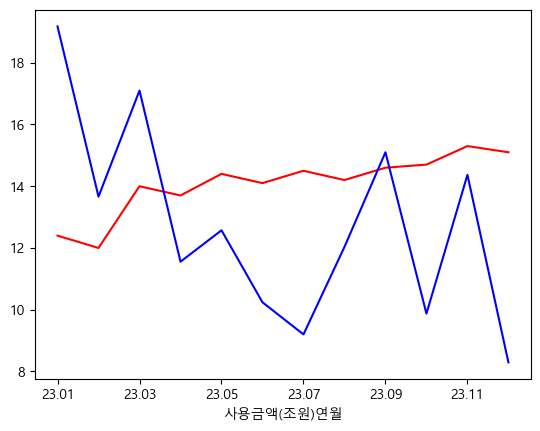

In [554]:
# 서울  무조건 빨간그래프가 2021년 , 파란그래프가 2023년 예측 그래프
seoul_2021_card_spend = df_card_spend['서울'][ : 12].sort_index()
seoul_2021_card_spend.plot(color = 'red')
whole_2023_data_t['서울'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

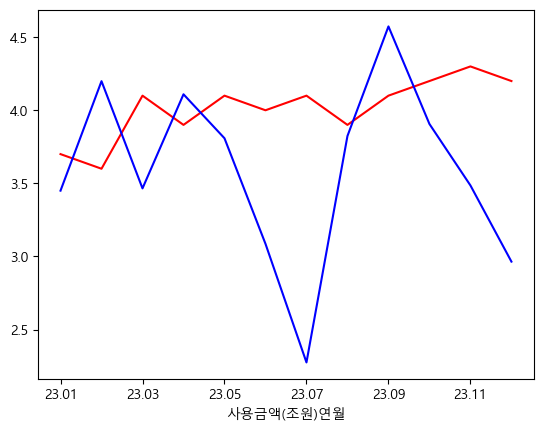

In [555]:
# 부산
busan_2021_card_spend = df_card_spend['부산'][ : 12].sort_index()
busan_2021_card_spend.plot(color = 'red')
whole_2023_data_t['부산'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

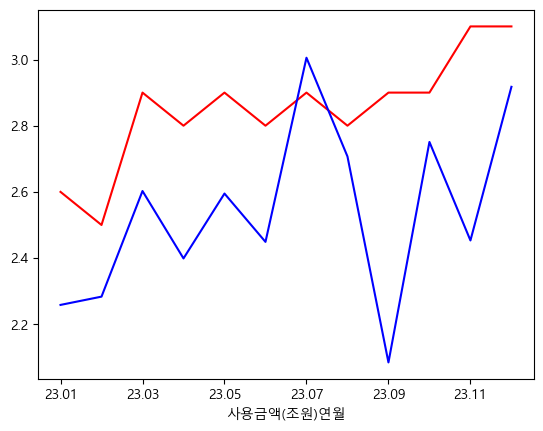

In [556]:
# 대구
daegu_2021_card_spend = df_card_spend['대구'][ : 12].sort_index()
daegu_2021_card_spend.plot(color = 'red')
whole_2023_data_t['대구'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

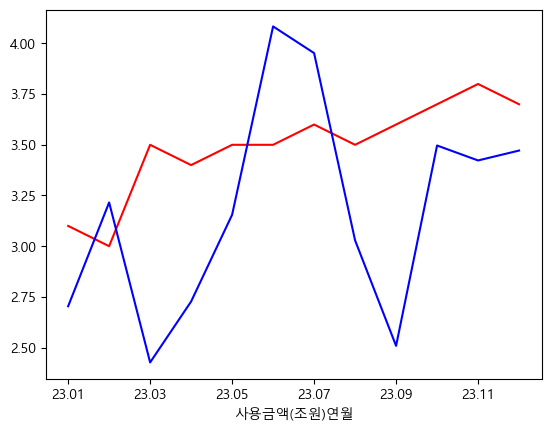

In [557]:
# 인천
incheon_2021_card_spend = df_card_spend['인천'][ : 12].sort_index()
incheon_2021_card_spend.plot(color = 'red')
whole_2023_data_t['인천'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

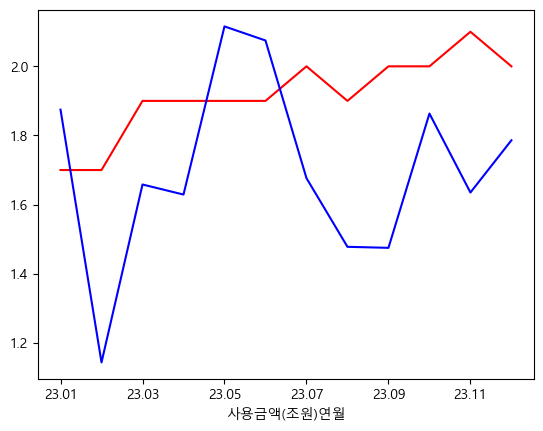

In [558]:
# 광주
gwangju_2021_card_spend = df_card_spend['광주'][ : 12].sort_index()
gwangju_2021_card_spend.plot(color = 'red')
whole_2023_data_t['광주'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

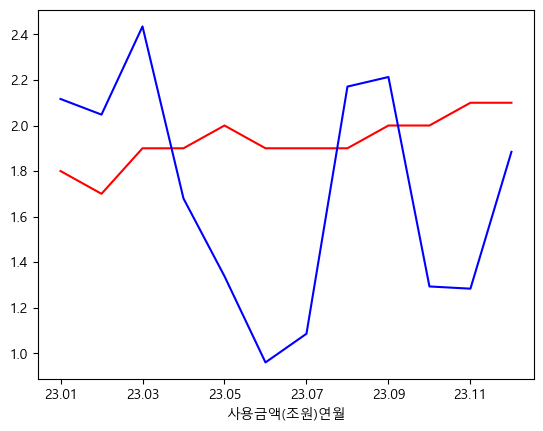

In [559]:
# 대전
daejun_2021_card_spend = df_card_spend['대전'][ : 12].sort_index()
daejun_2021_card_spend.plot(color = 'red')
whole_2023_data_t['대전'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

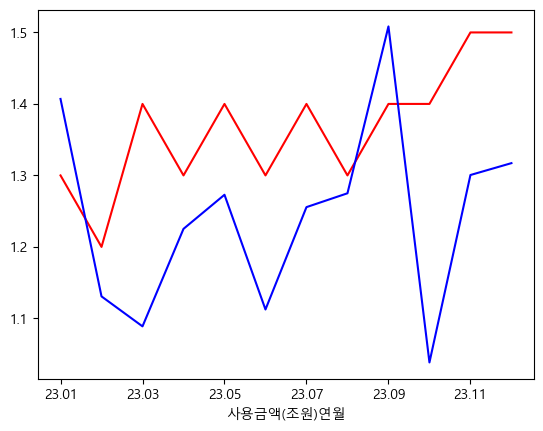

In [560]:
# 울산
ulsan_2021_card_spend = df_card_spend['울산'][ : 12].sort_index()
ulsan_2021_card_spend.plot(color = 'red')
whole_2023_data_t['울산'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

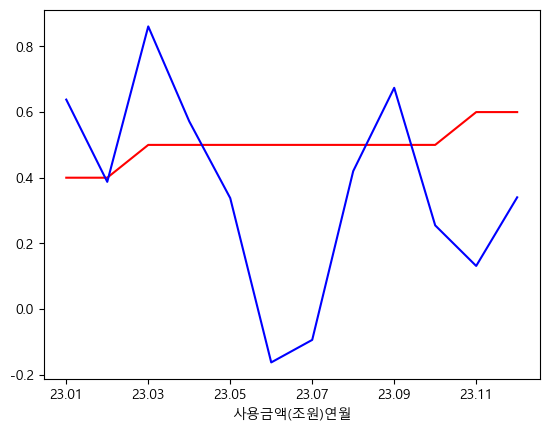

In [561]:
# 세종
sejong_2021_card_spend = df_card_spend['세종'][ : 12].sort_index()
sejong_2021_card_spend.plot(color = 'red')
whole_2023_data_t['세종'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

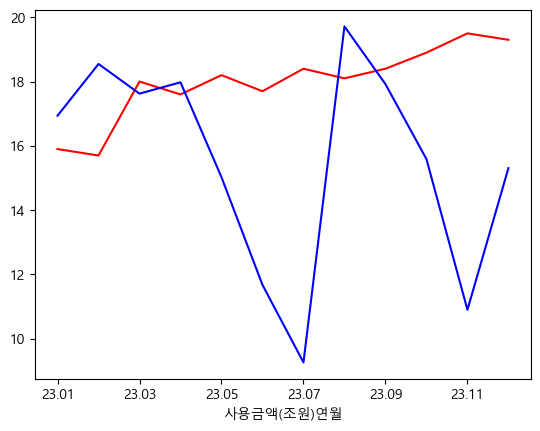

In [562]:
# 경기
gyunggi_2021_card_spend = df_card_spend['경기'][ : 12].sort_index()
gyunggi_2021_card_spend.plot(color = 'red')
whole_2023_data_t['경기'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

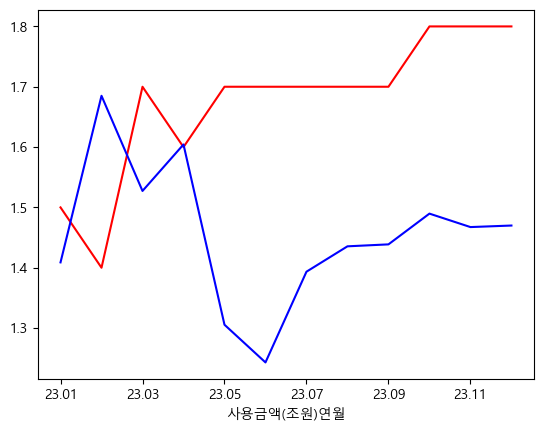

In [563]:
# 강원 
gangwon_2021_card_spend = df_card_spend['강원'][ : 12].sort_index()
gangwon_2021_card_spend.plot(color = 'red')
whole_2023_data_t['강원'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

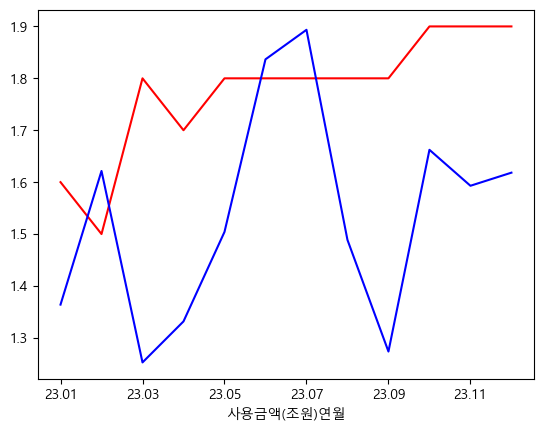

In [564]:
# 충북
chungbuk_2021_card_spend = df_card_spend['충북'][ : 12].sort_index()
chungbuk_2021_card_spend.plot(color = 'red')
whole_2023_data_t['충북'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

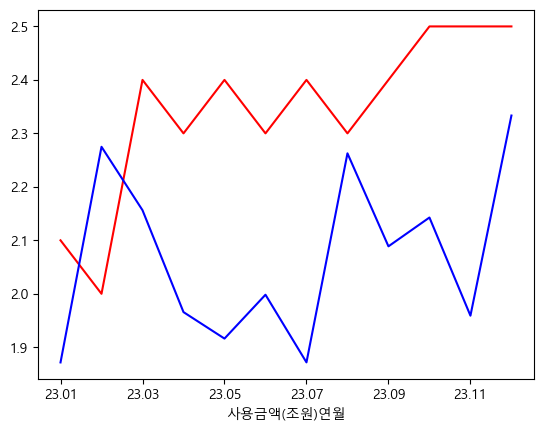

In [565]:
# 충남
chungnam_2021_card_spend = df_card_spend['충남'][ : 12].sort_index()
chungnam_2021_card_spend.plot(color = 'red')
whole_2023_data_t['충남'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

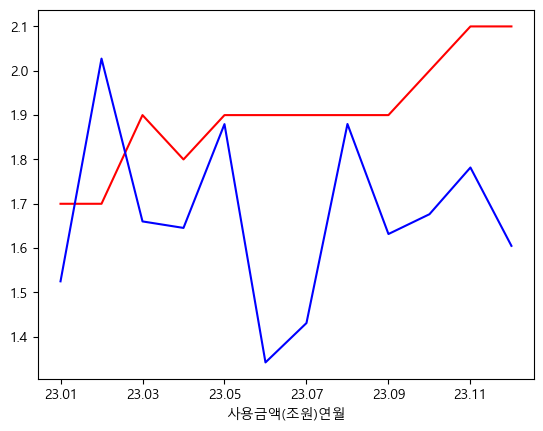

In [566]:
# 전북
junbuk_2021_card_spend = df_card_spend['전북'][ : 12].sort_index()
junbuk_2021_card_spend.plot(color = 'red')
whole_2023_data_t['전북'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

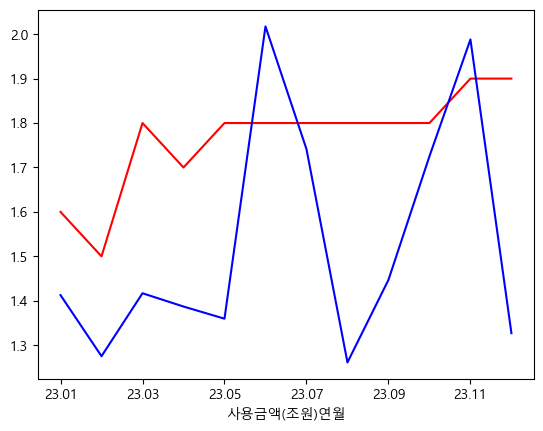

In [567]:
# 전남
junnam_2021_card_spend = df_card_spend['전남'][ : 12].sort_index()
junnam_2021_card_spend.plot(color = 'red')
whole_2023_data_t['전남'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

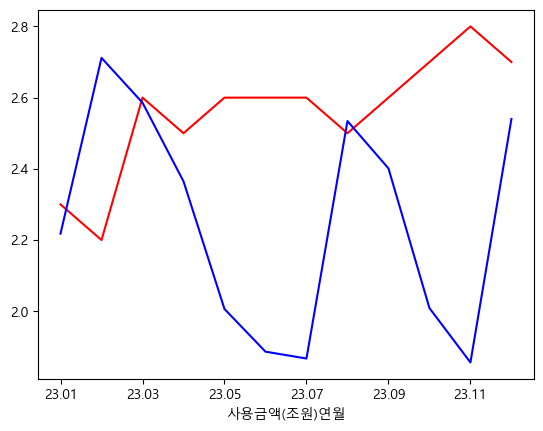

In [568]:
# 경북
gyungbuk_2021_card_spend = df_card_spend['경북'][ : 12].sort_index()
gyungbuk_2021_card_spend.plot(color = 'red')
whole_2023_data_t['경북'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

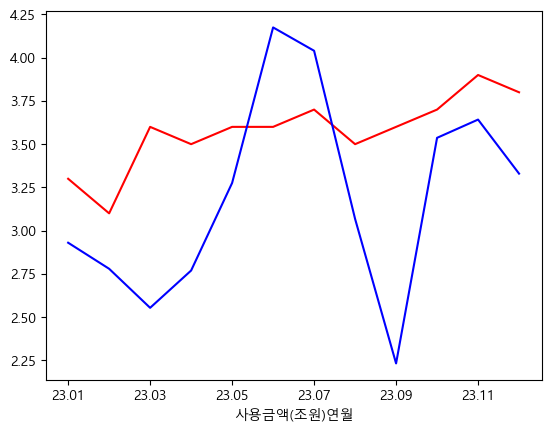

In [569]:
# 경남
gyungnam_2021_card_spend = df_card_spend['경남'][ : 12].sort_index()
gyungnam_2021_card_spend.plot(color = 'red')
whole_2023_data_t['경남'].plot(color = 'blue')

<Axes: xlabel='사용금액(조원)연월'>

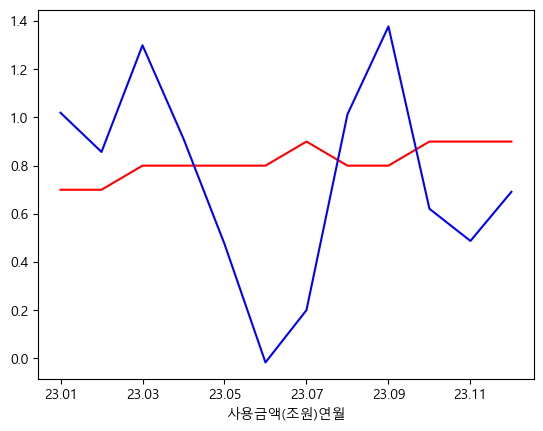

In [570]:
# 제주
jaeju_2021_card_spend = df_card_spend['제주'][ : 12].sort_index()
jaeju_2021_card_spend.plot(color = 'red')
whole_2023_data_t['제주'].plot(color = 'blue')